## Data Scientists
- Walker Teotônio Correia de Barros
- Maria Luiza Leite dos Santos
- Benn Arthur de Souza Fonseca Amaral
- Kennyo Wescley Elias Cavalcante

## Introduction
This analysis aims to provide metrics that assist investors in making decisions in the business intelligence application domain

## Data

#### Available historical series 
http://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/mercado-a-vista/series-historicas/

Contains the historical quotation information regarding the trading of all market paper for a period of one year, sorted by the fields Record Type, Trade Date, BDI Code, Company Name and Trading Code


In [236]:
!pip install seaborn
!pip install scikit-learn
!pip install plotly

## Modules (Collections of database)

In [237]:
#Data Vizualizations
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

#Machine Learning Library
from sklearn.datasets import make_blobs # function to generate aleatory dataset
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sklearn

#Math and Linear Algebra
import numpy as np
from math import sqrt
from scipy.stats import variation
#Create DataFrames
import pandas as pd

#Anapy Modules
'''Anapy is a repository created to solve problems involving statistical measures in our solution.'''
from anapy import shifting

<blockquote>Those datas are from Bovespa, in October of the year 2022<blockquote>

## Pre-processing of data 

#### Stage 1 - Structuring

 

To obtain the necessary data for the sample analysis, it was necessary to use some data preprocessing techniques. Since our sample was derived from a txt file, and the columns were not named, this had to be done manually using the .columns attribute, and the values had to be adjusted with commas.

In [238]:
#this file is compressed in the datasets repository, 
#extract it before running this code snippet
arquivo_bovespa = 'https://raw.githubusercontent.com/data-science-ci/actions-price-analysis/main/datasets/COTAHIST_M102022.TXT' 


#Define the size of fields
tamanho_campos=[2,8,2,12,3,12,10,3,4,13,13,13,13,13,13,13,5,18,18,13,1,8,7,13,12,3]

# Read the data and receive two positional arguments, widhts who have the fields size and header = 0
dados_acoes=pd.read_fwf(arquivo_bovespa, widths=tamanho_campos, header=0)


# Name the columns
# Data structure available at http://www.b3.com.br/data/files/33/67/B9/50/D84057102C784E47AC094EA8/SeriesHistoricas_Layout.pdf
dados_acoes.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

# Remove last line
linha=len(dados_acoes["data_pregao"])
dados_acoes=dados_acoes.drop(linha-1)

# Adjust values with a comma (divide the values of these columns by 100)
listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
]

for coluna in listaVirgula:
    dados_acoes[coluna]=[i/100. for i in dados_acoes[coluna]]


##### Data types

In [239]:
## Get Variable information
dados_acoes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181806 entries, 0 to 181805
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   tipo_registro                 181806 non-null  int64  
 1   data_pregao                   181806 non-null  object 
 2   cod_bdi                       181806 non-null  float64
 3   cod_negociacao                181806 non-null  object 
 4   tipo_mercado                  181806 non-null  int64  
 5   empresa                       181806 non-null  object 
 6   especificacao_papel           181806 non-null  object 
 7   prazo_dias_merc_termo         148349 non-null  float64
 8   moeda_referencia              181806 non-null  object 
 9   preco_abertura                181806 non-null  float64
 10  preco_maximo                  181806 non-null  float64
 11  preco_minimo                  181806 non-null  float64
 12  preco_medio                   181806 non-nul

#### Stage 2 - Remove Missing Data
During pre-processing, we also found data that did not make sense for analysis, or that were absurdly discrepant from the context of the application, probably caused by errors in the collection, so it was necessary to eliminate records that could cause problems in the measurements obtained

In [240]:
#Identify missing data
dados_acoes.isnull().sum()

tipo_registro                       0
data_pregao                         0
cod_bdi                             0
cod_negociacao                      0
tipo_mercado                        0
empresa                             0
especificacao_papel                 0
prazo_dias_merc_termo           33457
moeda_referencia                    0
preco_abertura                      0
preco_maximo                        0
preco_minimo                        0
preco_medio                         0
preco_ultimo_negocio                0
preco_melhor_oferta_compra          0
preco_melhor_oferta_venda           0
numero_negocios                     0
quantidade_papeis_negociados        0
volume_total_negociado              0
preco_exercicio                     0
ìndicador_correcao_precos           0
data_vencimento                     0
fator_cotacao                       0
preco_exercicio_pontos              0
codigo_isin                         0
num_distribuicao_papel              0
dtype: int64

In [241]:
## Removing missing data from df
dados_acoes = dados_acoes.dropna(axis=1)
dados_acoes.isnull().sum()

tipo_registro                   0
data_pregao                     0
cod_bdi                         0
cod_negociacao                  0
tipo_mercado                    0
empresa                         0
especificacao_papel             0
moeda_referencia                0
preco_abertura                  0
preco_maximo                    0
preco_minimo                    0
preco_medio                     0
preco_ultimo_negocio            0
preco_melhor_oferta_compra      0
preco_melhor_oferta_venda       0
numero_negocios                 0
quantidade_papeis_negociados    0
volume_total_negociado          0
preco_exercicio                 0
ìndicador_correcao_precos       0
data_vencimento                 0
fator_cotacao                   0
preco_exercicio_pontos          0
codigo_isin                     0
num_distribuicao_papel          0
dtype: int64

###### Anlysis of column "Indicadores de Correção de Preços"

{'mode': 0    0.0
Name: ìndicador_correcao_precos, dtype: float64, 'mean': 0.0, 'meadian': 0.0}


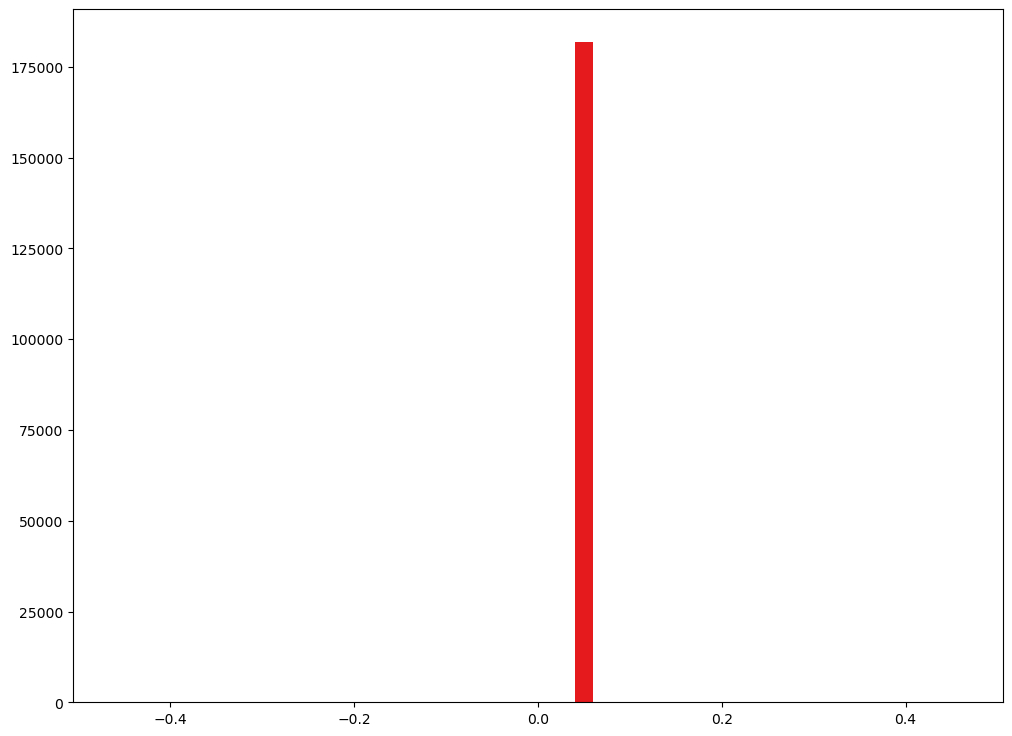

In [242]:
#There seems to be some noisy data here
plt.hist(x = dados_acoes["ìndicador_correcao_precos"], rwidth = 0.2)
indicador_correcao_precos = {
    "mode" : dados_acoes["ìndicador_correcao_precos"].mode() ,
    "mean" : dados_acoes["ìndicador_correcao_precos"].mean() ,
    "meadian" : dados_acoes["ìndicador_correcao_precos"].median()
}

## This column reveals nothing relevant
print(indicador_correcao_precos)

#Remove the column data_actions["price_correction_indicator"]
dados_acoes = dados_acoes.drop(["ìndicador_correcao_precos"], axis = "columns")

###### Analysis of column "preco_exercicio_pontos"

{'mode': 0    0.0
Name: preco_exercicio_pontos, dtype: float64, 'mean': 16459467.784341551, 'meadian': 0.0}


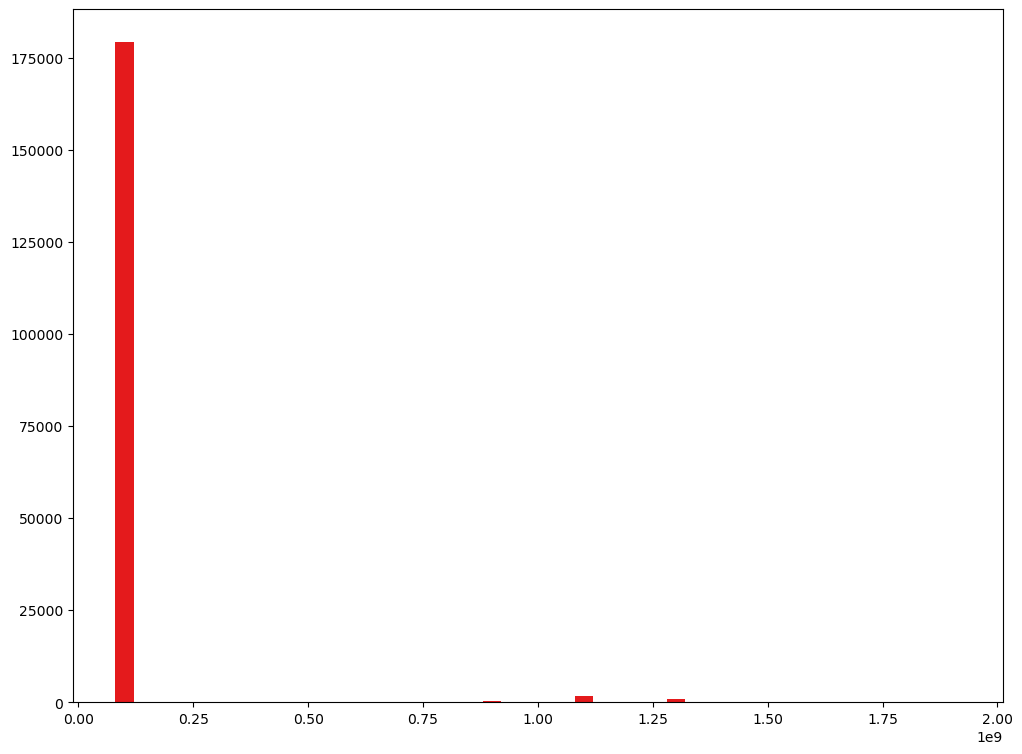

In [243]:
#There seems to be some noisy data here
plt.hist(x = dados_acoes["preco_exercicio_pontos"], rwidth = 0.2)
preco_exercicio_pontos = {
    "mode" : dados_acoes["preco_exercicio_pontos"].mode() ,
    "mean" : dados_acoes["preco_exercicio_pontos"].mean() ,
    "meadian" : dados_acoes["preco_exercicio_pontos"].median()
}
## This column reveals nothing relevant
print(preco_exercicio_pontos)
#Remove the column data_actions["price_correction_indicator"]
dados_acoes = dados_acoes.drop(["preco_exercicio_pontos"], axis = "columns")

In [244]:
#Sorts by dates of the last auctions for each record
dados_acoes = dados_acoes.sort_values(by=['data_pregao'])
dados_acoes

tipo_registro data_pregao  cod_bdi cod_negociacao  tipo_mercado  \
0                   1    20221003      2.0          ELMD3            10   
158385              1    20221003     82.0       VALEW731            80   
54388               1    20221003     78.0       BPACL266            70   
158374              1    20221003     82.0       VALEN780            80   
103762              1    20221003     82.0       NTCOW178            80   
...               ...         ...      ...            ...           ...   
58580               1    20221031     78.0       EGIEL418            70   
155990              1    20221031     78.0        VALEA92            70   
173714              1    20221031     78.0       BOVVK120            70   
41283               1    20221031     82.0       BBASX278            80   
37134               1    20221031     82.0       AMERX125            80   

            empresa especificacao_papel moeda_referencia  preco_abertura  \
0       ELETROMIDIA          ON      NM               R$           10.80   
158385    VALEE  FM          ON      NM               R$            2.90   
54388          BPAC          UNT     N2               R$            1.90   
158374        VALEE          ON      NM               R$            6.00   
103762        NTCOE          ON      NM               R$            3.25   
...             ...                 ...              ...             ...   
58580         EGIEE          ON      NM               R$            0.77   
155990         VALE          ON      NM               R$            4.22   
173714     BOVV  FM                  CI               R$            1.03   
41283         BBASE          ON      NM               R$            0.70   
37134         AMERE          ON      NM               R$            0.38   

        preco_maximo  ...  preco_melhor_oferta_compra  \
0              11.73  ...                       11.40   
158385          2.90  ...                        1.30   
54388           1.95  ...                        0.00   
158374          6.00  ...                        0.00   
103762          3.30  ...                        2.92   
...              ...  ...                         ...   
58580           1.19  ...                        0.00   
155990          5.02  ...                        0.00   
173714          1.03  ...                        0.00   
41283           0.70  ...                        0.30   
37134           0.40  ...                        0.01   

        preco_melhor_oferta_venda  numero_negocios  \
0                           11.44            680.0   
158385                       2.85             41.0   
54388                        0.00              2.0   
158374                       0.00              1.0   
103762                       0.00              5.0   
...                           ...              ...   
58580                        0.00              6.0   
155990                       0.00            153.0   
173714                       0.00              1.0   
41283                        0.88              1.0   
37134                        0.33              7.0   

        quantidade_papeis_negociados  volume_total_negociado  preco_exercicio  \
0                           216300.0               2469914.0             0.00   
158385                      110300.0                237538.0            69.84   
54388                         1500.0                  2900.0            26.60   
158374                         500.0                  3000.0            74.66   
103762                       21700.0                 70780.0            17.87   
...                              ...                     ...              ...   
58580                         4600.0                  3724.0            41.09   
155990                       32200.0                135846.0            70.41   
173714                           0.0                     1.0           120.00   
41283                          200.0              

#### > Those columns won't be usefull for data analysis, that's why we'll be removing it from the dataset

In [245]:
dados_acoes.drop(["moeda_referencia"], axis=1, inplace=True) 
dados_acoes.drop(["fator_cotacao"], axis=1, inplace=True)

#### > Narrow the data by company

In [246]:
x = dados_acoes["empresa"].value_counts()

In [247]:
x[1:15]

VALEE        6220
PETR         4858
BBASE        3892
MGLUE        3198
BOVAE        2973
VALE         2305
COGNE        2023
VIIAE        1942
MGLU         1900
BBAS         1740
ABEVE        1655
CSNAE        1640
IBOVE  FM    1608
USIME        1534
Name: empresa, dtype: int64

##### >> In this case: PETRE

In [248]:
empresa_1 = dados_acoes[dados_acoes["empresa"] == "PETRE"]

## How are the prices of PETRE's latest trades centered?

#### First the price data of the last trades will be allocated to a one-dimensional Series object 

In [249]:
#Get the last business price  of PETRE
PETRE_last_value = empresa_1["preco_ultimo_negocio"]
#get data as an numpy array 
PETRE_arr = np.array(PETRE_last_value)
type(PETRE_last_value)
type(PETRE_arr)

#Sort price of PETRE's last trades
PETRE_arr.sort()
print(PETRE_arr)

[1.000e-02 1.000e-02 1.000e-02 ... 4.877e+01 4.927e+01 4.977e+01]


In [250]:
PETRE_last_value.describe()

count    10027.000000
mean         4.105726
std          5.729424
min          0.010000
25%          0.240000
50%          1.700000
75%          5.750000
max         49.770000
Name: preco_ultimo_negocio, dtype: float64

#### The "central_tendency_measures" dictionary contains data on the measures of central tendency of the Series in question

In this case the object of the series is about "Petrobras", but we can use this same idea to get information about other investment possibilities

In [251]:
central_tendency_measures = {
    "mean": PETRE_last_value.mean(),
    "mode": PETRE_last_value.mode(dropna = True),
    "median": PETRE_last_value.median(), 
    "max": PETRE_last_value.max(),
    "min": PETRE_last_value.min(),
}
pd.Series(central_tendency_measures)

mean                                               4.105726
mode      0    0.01
Name: preco_ultimo_negocio, dtype: f...
median                                                  1.7
max                                                   49.77
min                                                    0.01
dtype: object

So we can create a function to make this block of code reusable

In [252]:
def get_central_tendency_measures(series):
    return pd.Series({
        "mean" : series.mean(),
        "mode" : series.mode(dropna=True),
        "median" : series.median(),
        "max" : series.max(),
        "min" : series.min()
    })

In [253]:
# we also can be a function to set the meta_data and get_data info about any business
def set_meta_data(business_name, column):
    business_metadata = {
        "business" : dados_acoes[dados_acoes["empresa"] == business_name],
}   
    business_metadata["column"] = business_metadata["business"][column]
    return business_metadata
 


In [254]:
data_vale = set_meta_data("VALE" , "preco_ultimo_negocio")
data_petre = set_meta_data("PETRE", "preco_ultimo_negocio")
print(f'''Examples\n
PETRE\n{get_central_tendency_measures(data_petre["column"])}\n
VALE\n{get_central_tendency_measures(data_vale["column"])}''')

Examples

PETRE
mean                                               4.105726
mode      0    0.01
Name: preco_ultimo_negocio, dtype: f...
median                                                  1.7
max                                                   49.77
min                                                    0.01
dtype: object

VALE
mean                                              11.236816
mode      0    0.01
Name: preco_ultimo_negocio, dtype: f...
median                                                  3.0
max                                                   83.34
min                                                    0.01
dtype: object


## How PETRE's actions are distributed?


#### Variability Measures
Is there any uniformity between the measures that was found?

In [255]:
# output: [ 1  1  0  4 -5]
variability_measures = {
    "variance" : PETRE_last_value.var(),
    "standard deviation": PETRE_last_value.std(),
    "shifiting_range" : np.unique(shifting.shifting_range(PETRE_arr)),
    "CV" : variation(PETRE_last_value)
}
pd.Series(variability_measures)
 

[4.977e+01 1.000e-02 1.000e-02 ... 4.827e+01 4.877e+01 4.927e+01]


variance                                                      32.826294
standard deviation                                             5.729424
shifiting_range       [-49.760000000000005, 0.0, 0.00999999999999801...
CV                                                             1.395402
dtype: object

In [256]:
def get_variability_measures(series):
    return pd.Series({
        "variance" : series.var(),
        "standard deviation" : series.std(),
        "shifiting_range" : np.unique(shifting.shifting_range(np.array(series))),
        "CV": variation(series) 
    })
get_variability_measures(PETRE_last_value)

# We can also use this for any other investiment , by using set_meta_data
#for example
#vale
meta_data_vale = set_meta_data("VALE" , "preco_ultimo_negocio")
print(meta_data_vale)
#Know obtain the variability measures for this column
get_variability_measures(meta_data_vale["column"])


[1.14 9.66 2.25 ... 2.2  0.01 1.01]
{'business':         tipo_registro data_pregao  cod_bdi cod_negociacao  tipo_mercado  \
158328              1    20221003     78.0       VALEJ640            70   
158314              1    20221003     78.0       VALEJ600            70   
158312              1    20221003     78.0        VALEE10            70   
158420              1    20221003     78.0       VALEJ650            70   
158234              1    20221003     78.0       VALEC867            70   
...               ...         ...      ...            ...           ...   
156180              1    20221031     78.0        VALEI10            70   
156144              1    20221031     78.0       VALEA117            70   
156012              1    20221031     78.0        VALEA98            70   
155998              1    20221031     78.0        VALEA94            70   
155990              1    20221031     78.0        VALEA92            70   

       empresa especificacao_papel  preco_abertura

variance                                                     441.543652
standard deviation                                             21.01294
shifiting_range       [-81.21, -80.42, -78.01, -76.59, -76.52, -76.0...
CV                                                             1.869603
dtype: object

# - Inicial Exploration
##  Analysis of the company "Petrobrás" in October

### > Last traded price (Preço de último negócio)

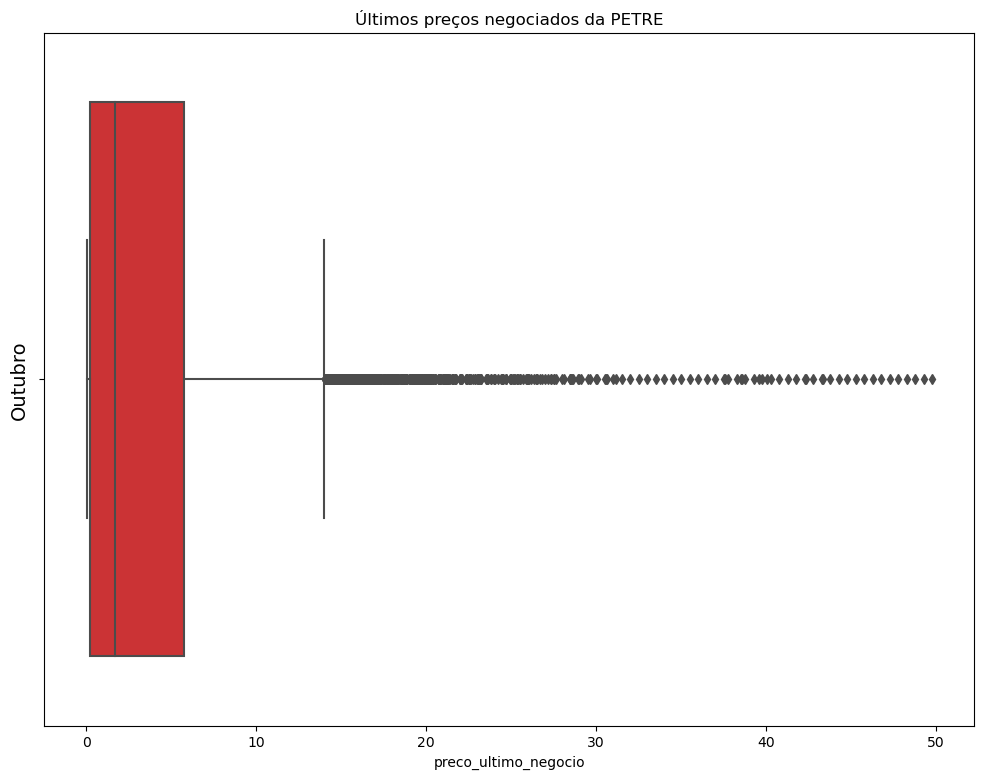

In [257]:
boxplot_empresa1_precoultimo_plt = sns.boxplot(x=empresa_1["preco_ultimo_negocio"]) # colocando o boxplot numa variável para manipular melhor
boxplot_empresa1_precoultimo_plt.set_ylabel('Outubro', fontsize=14) # Aqui você renomeia o eixo que deseja e o tamanho da fonte

boxplot_empresa1_precoultimo_plt.plot() # Aqui é como se o gráfico fosse ocultado até ser usado plt.show()

# em R$ - Reais
plt.title('Últimos preços negociados da PETRE') # O título que se deseja colocar acima do gráfico

plt.show() # Impressão do gráfico

### > Total trading volume (Volume total negociado)

In [258]:
empresa1 = set_meta_data("PETRE" , "volume_total_negociado")

In [259]:
measures = (get_central_tendency_measures(empresa1["column"]) , 
get_variability_measures(empresa1["column"]))
x , y = measures
print(x)
print(y)
print(y["shifiting_range"][1:5])

[1.362216e+06 6.657000e+04 1.125000e+03 ... 2.100000e+03 2.000000e+00
 4.099220e+05]
mean                                          710625.809016
mode      0    1.0
Name: volume_total_negociado, dtype: ...
median                                              38973.0
max                                             338019130.0
min                                                     1.0
dtype: object
variance                                          37278271829902.679688
standard deviation                                       6105593.487115
shifiting_range       [-338019035.0, -271605728.0, -171381074.0, -12...
CV                                                             8.591426
dtype: object
[-2.71605728e+08 -1.71381074e+08 -1.20463748e+08 -1.03430664e+08]


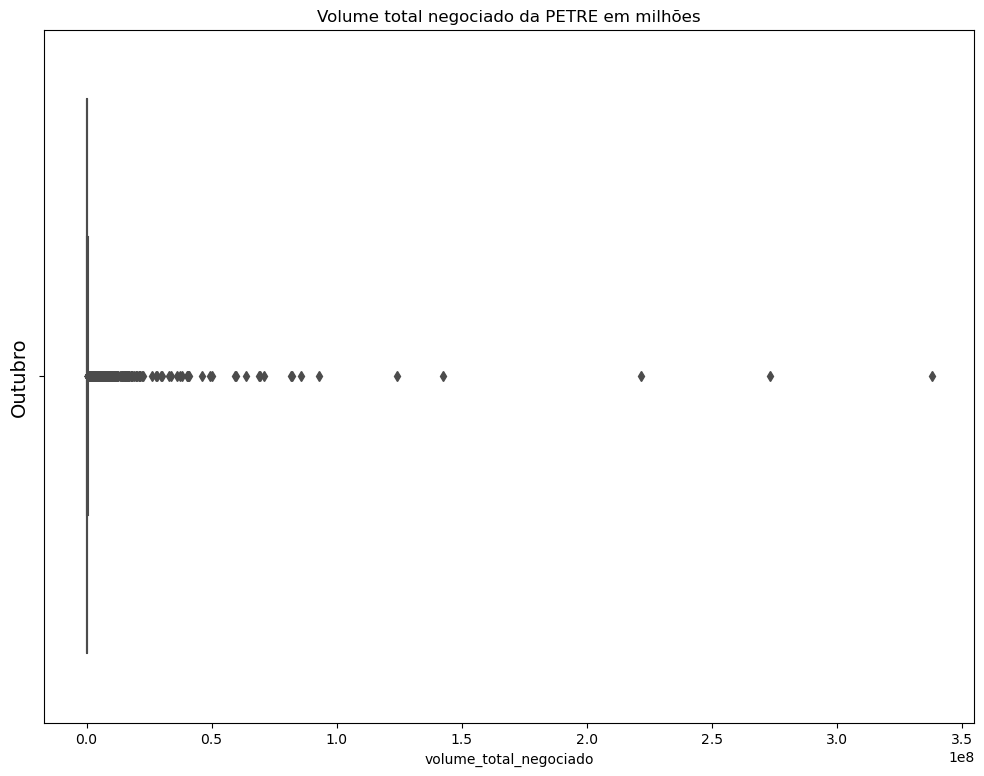

In [260]:
boxplot_empresa1_volumetotal_plt = sns.boxplot(x=empresa_1["volume_total_negociado"])
boxplot_empresa1_volumetotal_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_volumetotal_plt.plot()


plt.title('Volume total negociado da PETRE em milhões')

plt.show()

### > Number of Trades (Número de negócios)

In [261]:
empresa_1["numero_negocios"].std()

384.4783561749801

In [262]:
empresa_1["numero_negocios"].mean()

124.9536252119278

In [263]:
empresa_1["numero_negocios"].median()

13.0

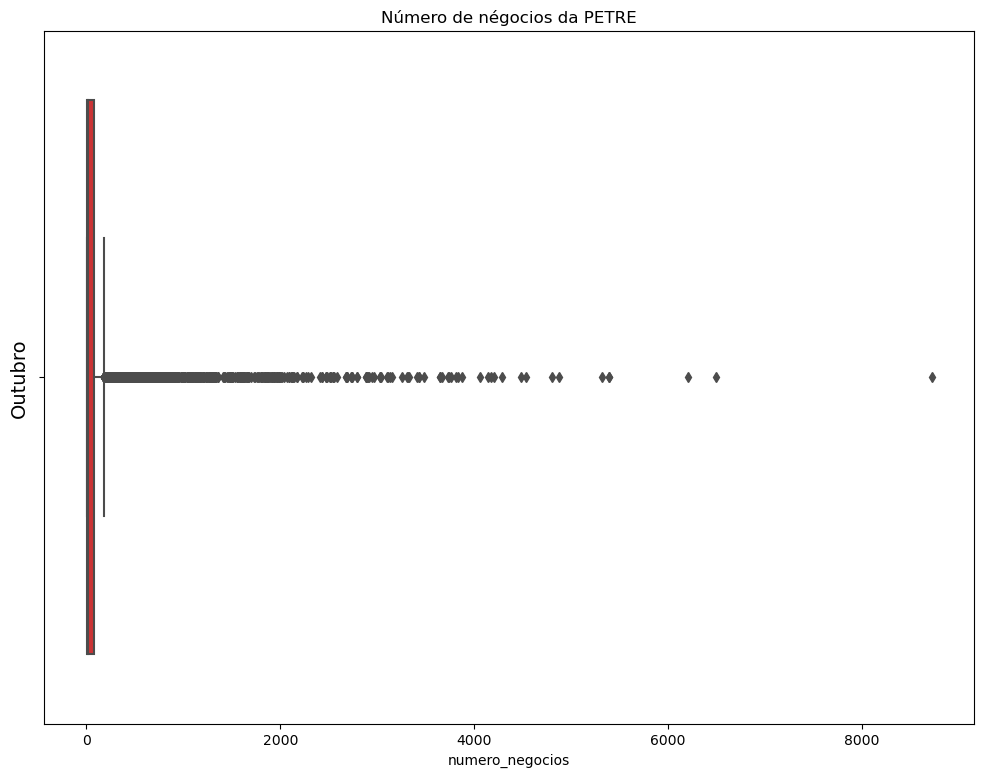

In [264]:
boxplot_empresa1_numeronegocios_plt = sns.boxplot(x=empresa_1["numero_negocios"])
boxplot_empresa1_numeronegocios_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_numeronegocios_plt.plot()


plt.title('Número de négocios da PETRE')

plt.show()

### > Maximum Closing Prices (Preço máximo das ações)

In [265]:
empresa_1["preco_maximo"].std()

5.776885233995995

In [266]:
empresa_1["preco_maximo"].mean()

4.266220205445269

In [267]:
empresa_1["preco_maximo"].median()

1.9

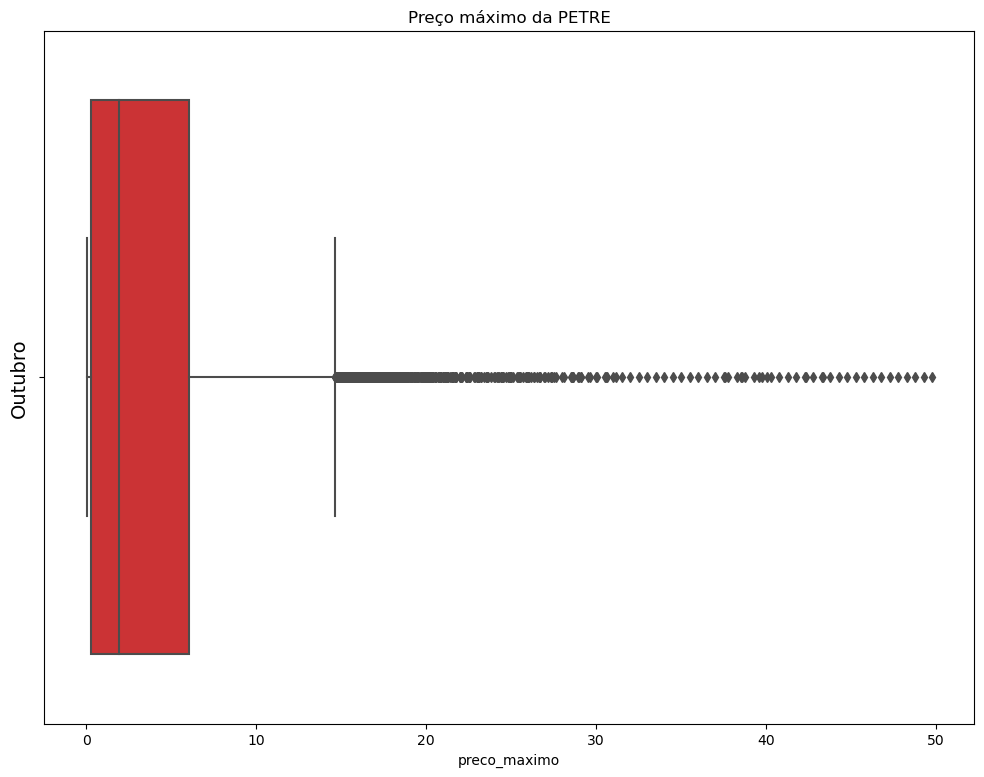

In [268]:
boxplot_empresa1_maximo_plt = sns.boxplot(x = empresa_1["preco_maximo"])
boxplot_empresa1_maximo_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_maximo_plt.plot()


plt.title('Preço máximo da PETRE') # em R$ - Reais

plt.show()

### > Minimum Closing Prices (Preço mínimo das ações)

In [269]:
empresa_1["preco_minimo"].std()

5.66094762431851

In [270]:
empresa_1["preco_minimo"].mean()

3.928716465543013

In [271]:
empresa_1["preco_minimo"].median()

1.5

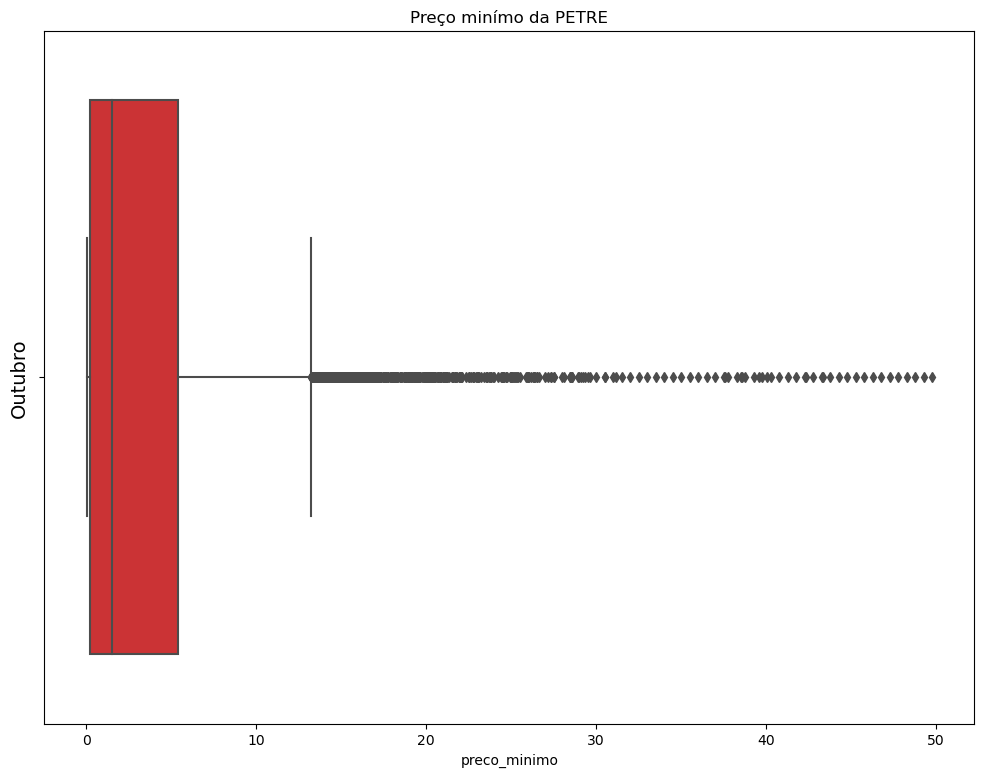

In [272]:
boxplot_empresa1_minimo_plt = sns.boxplot(x = empresa_1["preco_minimo"])
boxplot_empresa1_minimo_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_minimo_plt.plot()


plt.title('Preço minímo da PETRE') # em R$ - Reais

plt.show()

### > Stock Opening Price (Preço de abertura das ações)

In [273]:
empresa_1["preco_abertura"].mean()

4.09339283933376

In [274]:
empresa_1["preco_abertura"].std()

5.707135405067777

In [275]:
empresa_1["preco_abertura"].median()

1.71

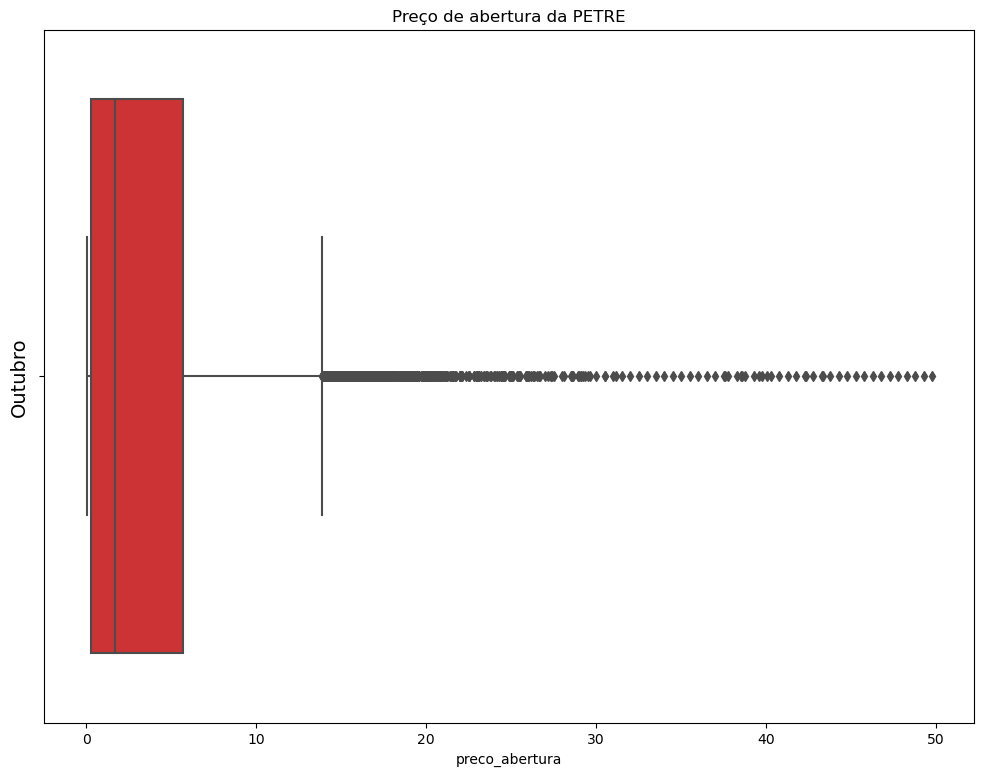

In [276]:
boxplot_empresa1_abertura_plt = sns.boxplot(x = empresa_1["preco_abertura"])
boxplot_empresa1_abertura_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_abertura_plt.plot()


plt.title('Preço de abertura da PETRE') # em R$ - Reais

plt.show()

### >> Table with some correlations

In [277]:
empresa_1[["preco_abertura", "preco_ultimo_negocio","preco_minimo","preco_maximo","numero_negocios","volume_total_negociado"]].corr()

preco_abertura  preco_ultimo_negocio  preco_minimo  \
preco_abertura                1.000000              0.997253      0.998526   
preco_ultimo_negocio          0.997253              1.000000      0.998425   
preco_minimo                  0.998526              0.998425      1.000000   
preco_maximo                  0.998428              0.998670      0.997138   
numero_negocios              -0.109370             -0.111930     -0.119470   
volume_total_negociado        0.207455              0.206519      0.207331   

                        preco_maximo  numero_negocios  volume_total_negociado  
preco_abertura              0.998428        -0.109370                0.207455  
preco_ultimo_negocio        0.998670        -0.111930                0.206519  
preco_minimo                0.997138        -0.119470                0.207331  
preco_maximo                1.000000        -0.102856                0.206406  
numero_negocios            -0.102856         1.000000                0.146719  
volume_total_negociado      0.206406         0.146719                1.000000

# Data Visualization

### - Scatter Plot

<AxesSubplot:xlabel='preco_abertura', ylabel='preco_ultimo_negocio'>

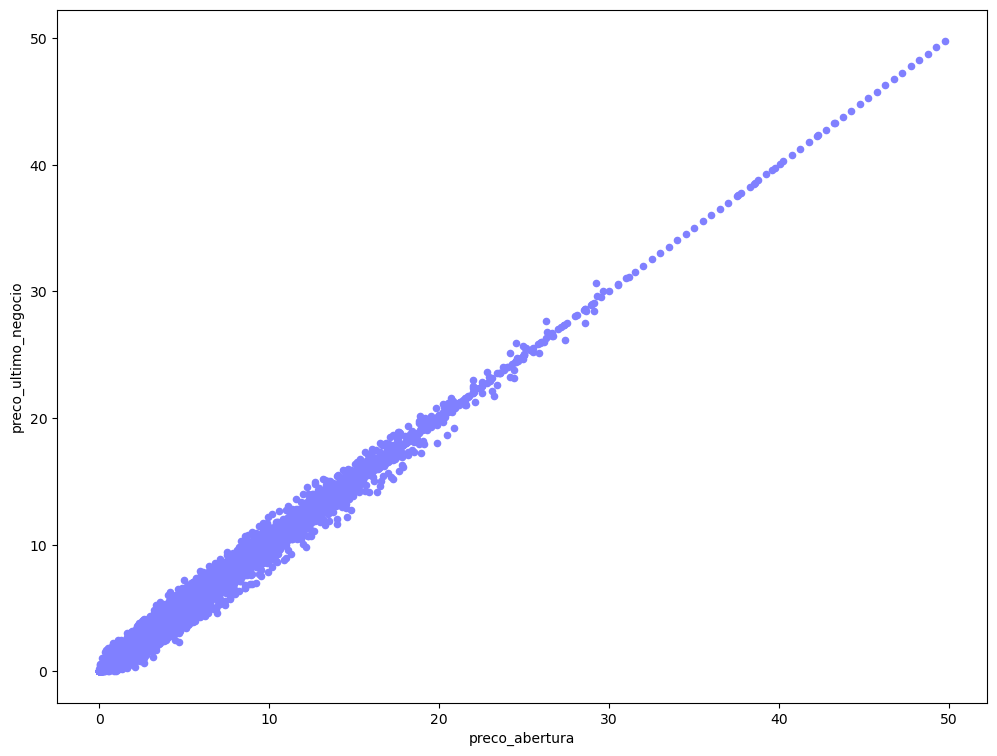

In [278]:
color=np.array([0.5, 0.5, 1]).reshape(1,-1)
empresa_1.plot.scatter(x="preco_abertura",y="preco_ultimo_negocio", c=color)

<AxesSubplot:xlabel='numero_negocios', ylabel='volume_total_negociado'>

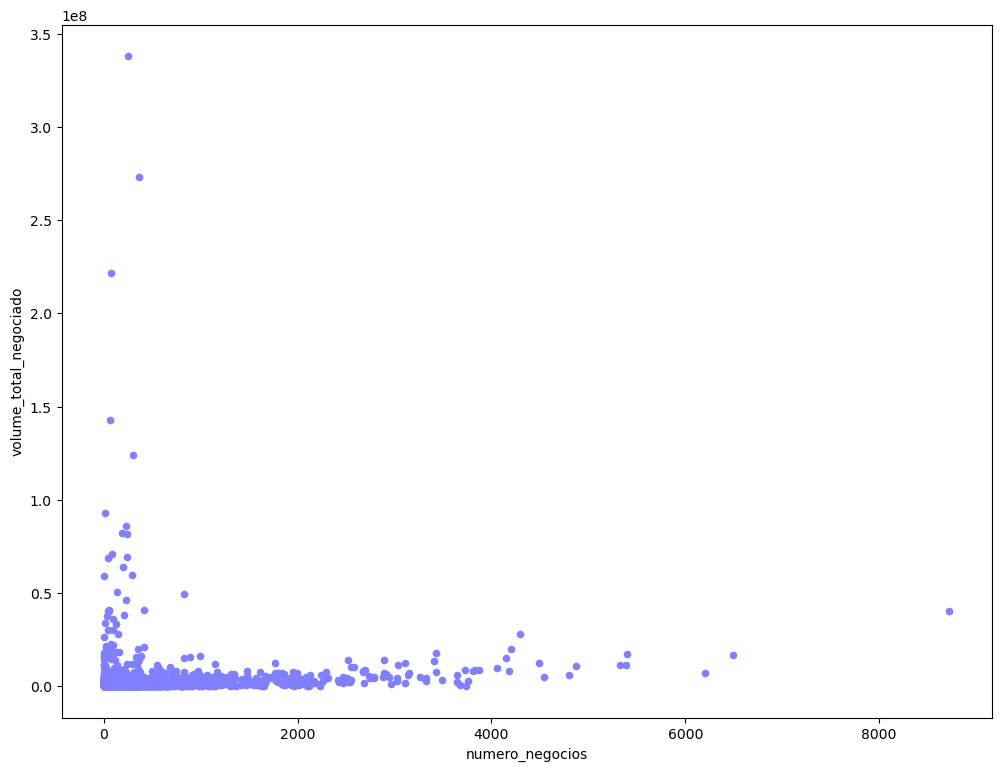

In [279]:
empresa_1.plot.scatter(x="numero_negocios",y="volume_total_negociado",c=color)

<AxesSubplot:xlabel='preco_minimo', ylabel='preco_maximo'>

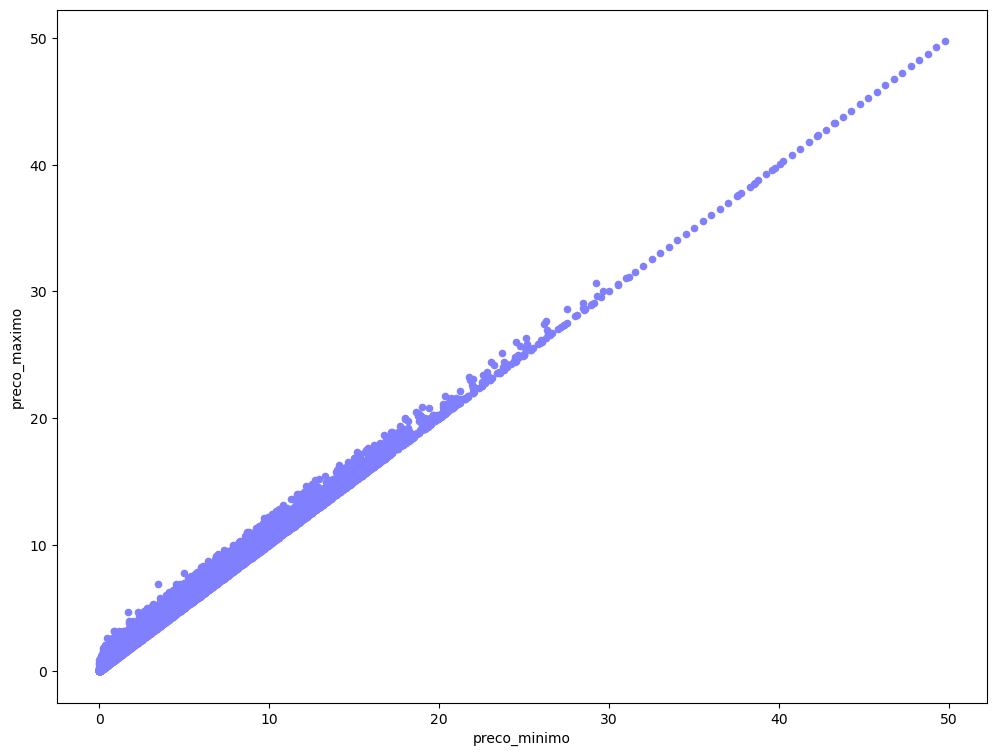

In [280]:
empresa_1.plot.scatter(x="preco_minimo",y="preco_maximo",c=color)

<AxesSubplot:xlabel='numero_negocios', ylabel='preco_ultimo_negocio'>

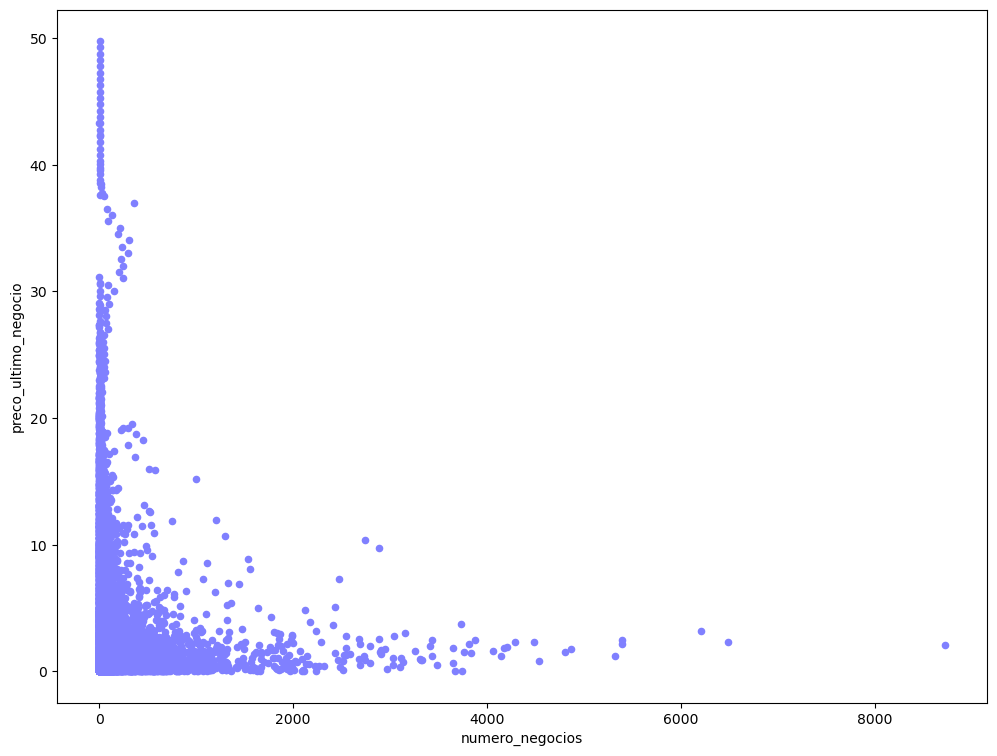

In [281]:
empresa_1.plot.scatter(x="numero_negocios",y="preco_ultimo_negocio",c=color)

<AxesSubplot:xlabel='volume_total_negociado', ylabel='preco_ultimo_negocio'>

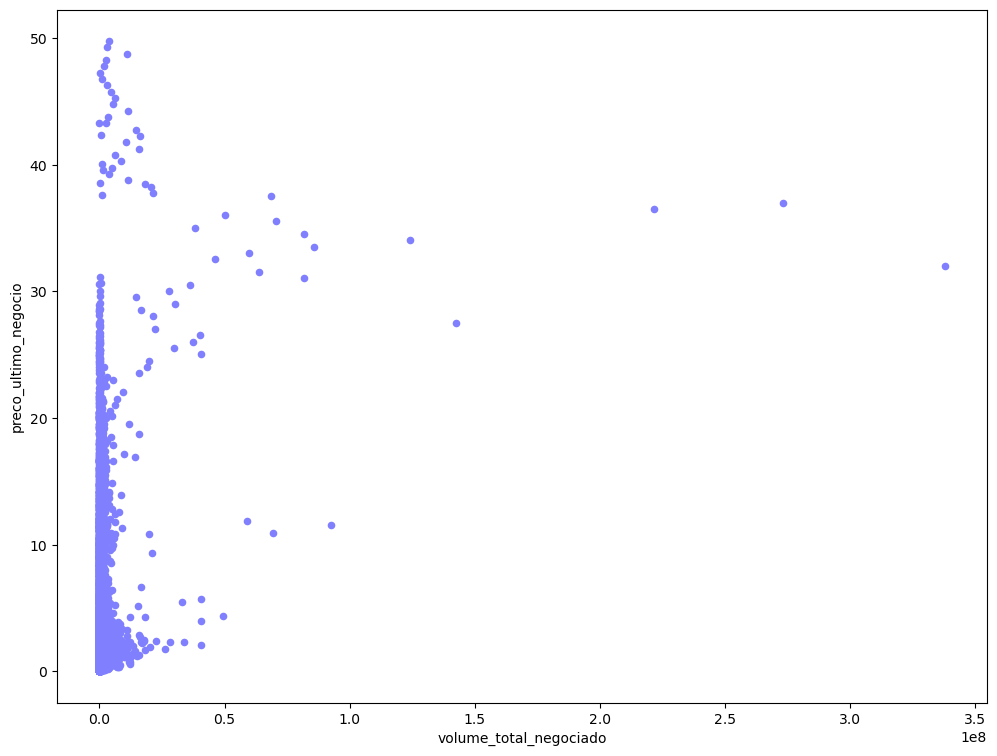

In [282]:
empresa_1.plot.scatter(x="volume_total_negociado",y="preco_ultimo_negocio",c=color)

In [283]:
#Using seaborn
sns.set_palette('Set1')

###### > Creating others dataframes of some companies from the main dataframe and then concatenating them.

In [284]:
empresa_2 = dados_acoes[dados_acoes["empresa"] == "VALEE"]
empresa_3 = dados_acoes[dados_acoes["empresa"] == "BBASE"]
empresa_4 = dados_acoes[dados_acoes["empresa"] == "MGLUE"]
empresa_5 = dados_acoes[dados_acoes["empresa"] == "COGNE"]

In [285]:
empresas = pd.concat([empresa_1, empresa_2, empresa_3, empresa_4, empresa_5])

In [286]:
empresas

tipo_registro data_pregao  cod_bdi cod_negociacao  tipo_mercado  \
103684              1    20221003     82.0       PETRW387            80   
104371              1    20221003     78.0       PETRA257            70   
104414              1    20221003     82.0       PETRX171            80   
104429              1    20221003     82.0       PETRX229            80   
104026              1    20221003     82.0       PETRW412            80   
...               ...         ...      ...            ...           ...   
57287               1    20221031     82.0       COGNM365            80   
57290               1    20221031     82.0       COGNV400            80   
57298               1    20221031     82.0       COGNW415            80   
173792              1    20221031     82.0       COGNM300            80   
173723              1    20221031     78.0       COGNL315            70   

       empresa especificacao_papel  preco_abertura  preco_maximo  \
103684   PETRE          PN      N2            9.36          9.66   
104371   PETRE          PN      N2            2.25          2.25   
104414   PETRE          PN      N2            1.45          1.48   
104429   PETRE          PN      N2            0.08          0.08   
104026   PETRE          PN      N2            8.42          9.44   
...        ...                 ...             ...           ...   
57287    COGNE          ON      NM            0.46          0.46   
57290    COGNE          ON      NM            0.97          0.97   
57298    COGNE          ON      NM            0.80          0.80   
173792   COGNE          ON      NM            0.14          0.17   
173723   COGNE          ON      NM            0.38          0.49   

        preco_minimo  ...  preco_ultimo_negocio  preco_melhor_oferta_compra  \
103684          9.36  ...                  9.66                        0.00   
104371          2.25  ...                  2.25                        1.60   
104414          1.35  ...                  1.40                        1.21   
104429          0.08  ...                  0.08                        0.03   
104026          8.42  ...                  9.44                        0.00   
...              ...  ...                   ...                         ...   
57287           0.46  ...                  0.46                        0.00   
57290           0.97  ...                  0.97                        0.00   
57298           0.80  ...                  0.80                        0.50   
173792          0.14  ...                  0.17                        0.17   
173723          0.29  ...                  0.35                        0.27   

        preco_melhor_oferta_venda  numero_negocios  \
103684                       0.00              2.0   
104371                       0.00              1.0   
104414                       2.96              5.0   
104429                       0.00              1.0   
104026                       0.00              2.0   
...                           ...              ...   
57287                        0.00              1.0   
57290                        0.97              1.0   
57298                        0.00              1.0   
173792                       0.00              2.0   
173723                       0.41             23.0   

        quantidade_papeis_negociados  volume_total_negociado  preco_exercicio  \
103684                        7000.0                 66570.0            42.02   
104371                         500.0                  1125.0            34.02   
104414                        1100.0                  1535.0            29.27   
104429                        1000.0                    80.0            19.02   
104026                        3600.0                 33882.0            41.77   
...                              ...                     ...              ...   
57287                        10000.0                  4600.0             3.65   
57290                         3000.0        

<AxesSubplot:xlabel='data_pregao', ylabel='numero_negocios'>

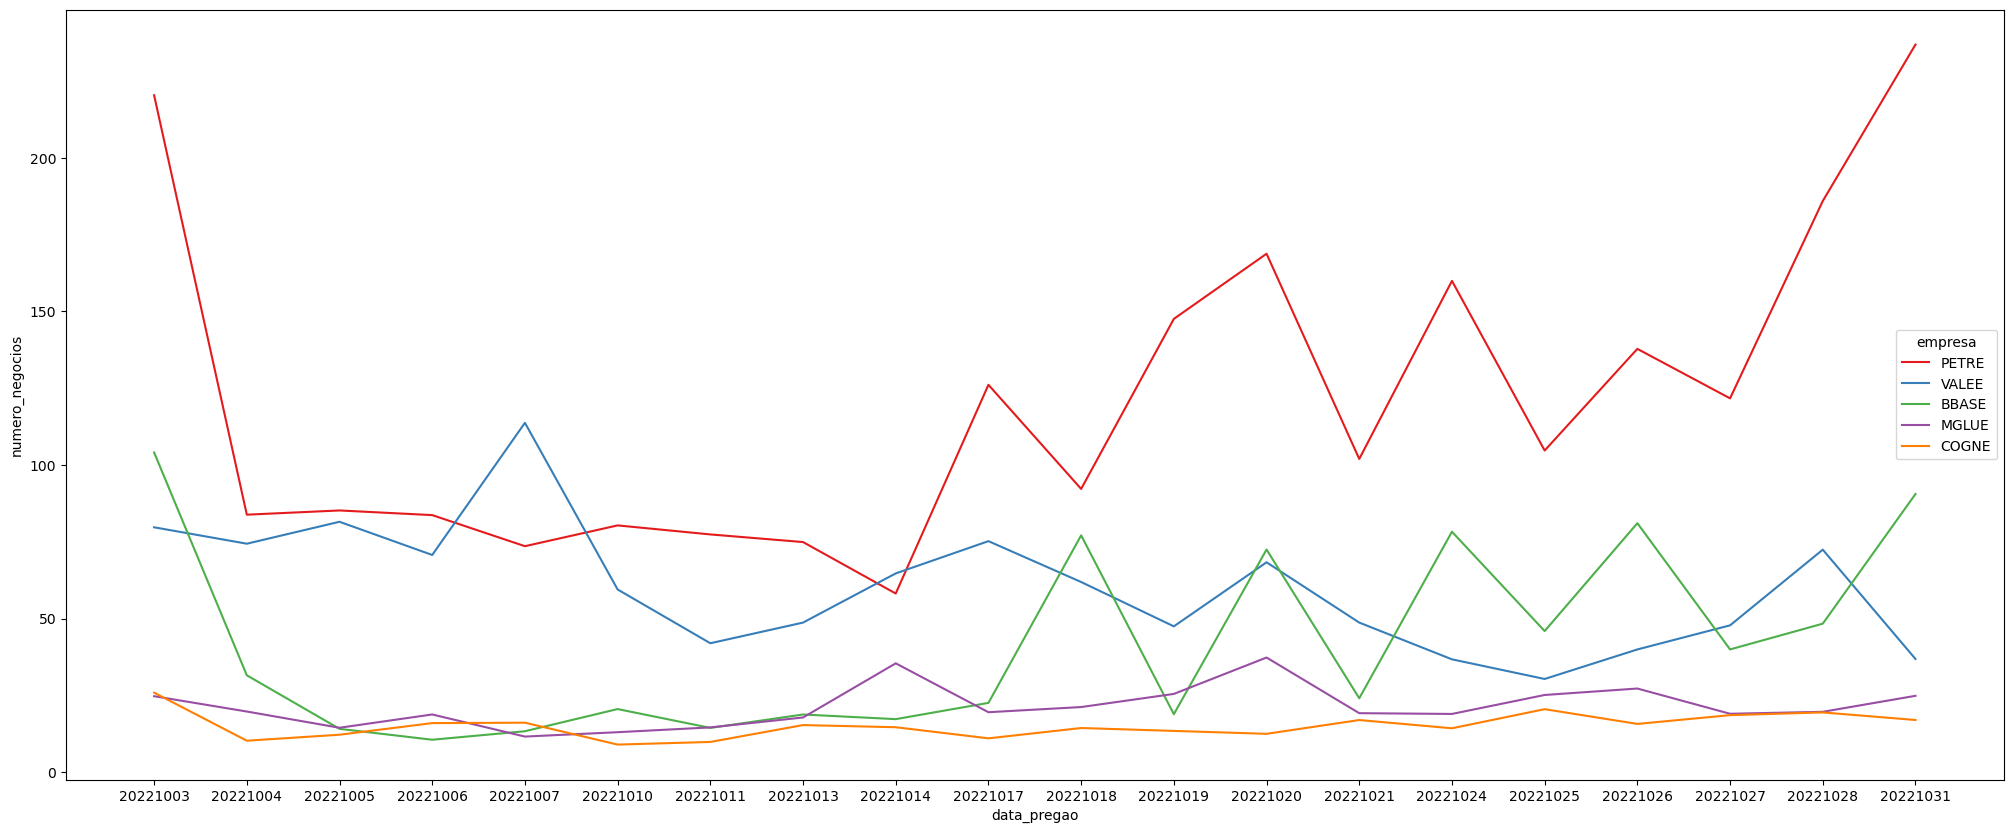

In [287]:
plt.figure(figsize=(25,10))
sns.lineplot(data=empresas, x="data_pregao", y="numero_negocios", hue="empresa", err_style=None)
# Lembrando que 202210 -> mes de outubro em 2022

<AxesSubplot:xlabel='data_pregao', ylabel='preco_ultimo_negocio'>

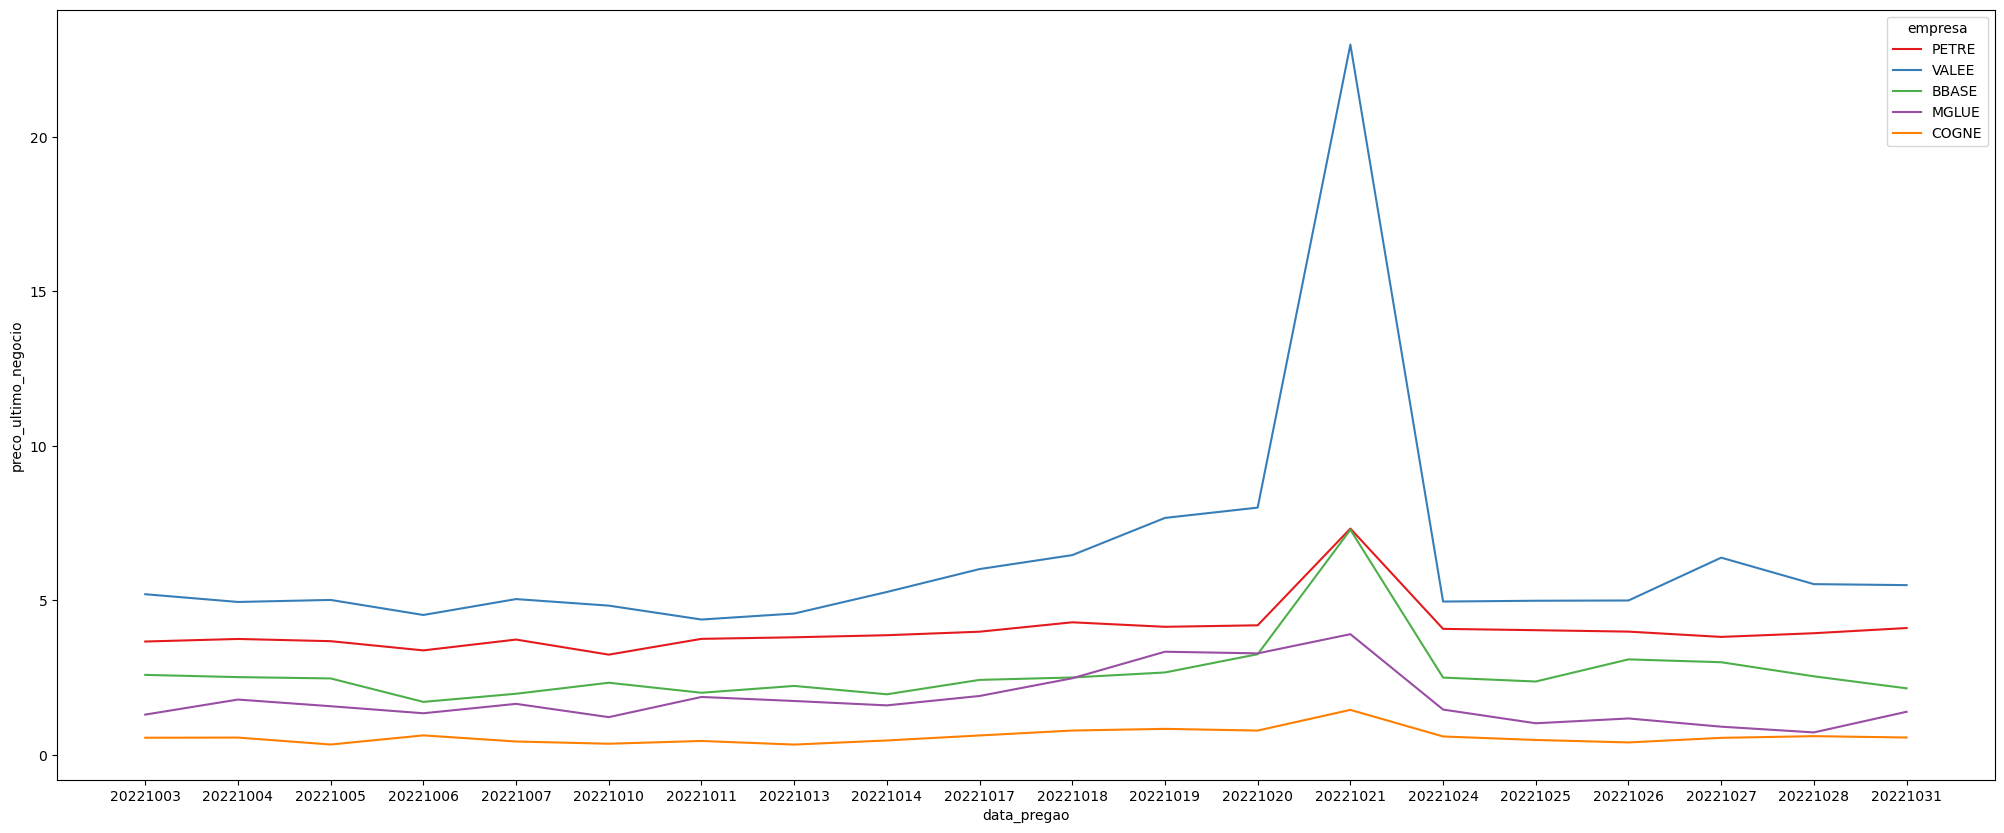

In [288]:
plt.figure(figsize=(25,10))
sns.lineplot(data=empresas, x="data_pregao", y="preco_ultimo_negocio", hue="empresa", err_style=None)

<AxesSubplot:xlabel='data_pregao', ylabel='volume_total_negociado'>

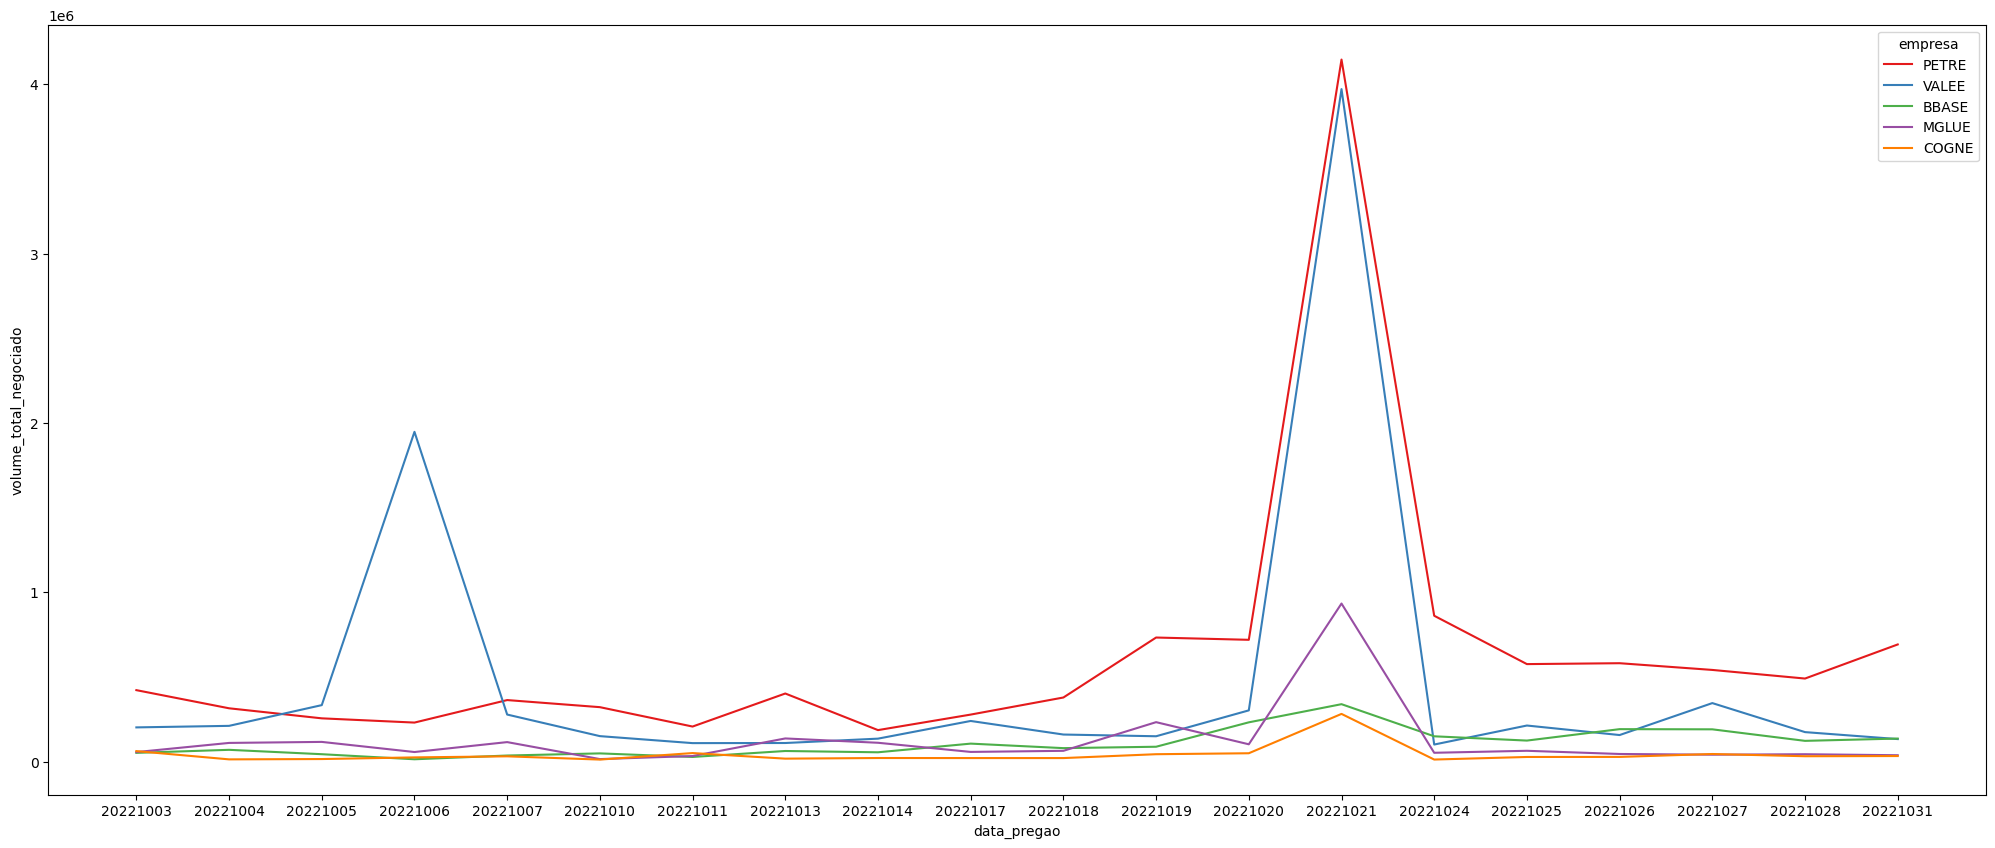

In [289]:
plt.figure(figsize=(25,10))
sns.lineplot(data=empresas, x="data_pregao", y="volume_total_negociado", hue="empresa", err_style=None)

<AxesSubplot:xlabel='preco_ultimo_negocio', ylabel='numero_negocios'>

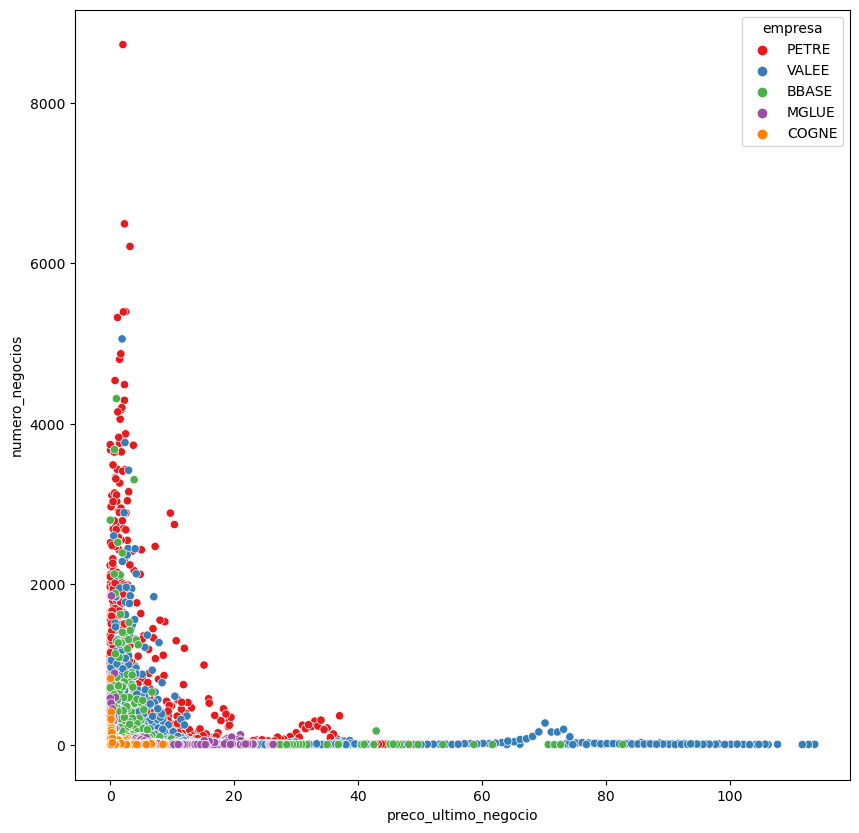

In [290]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=empresas, x='preco_ultimo_negocio', y='numero_negocios', hue="empresa")

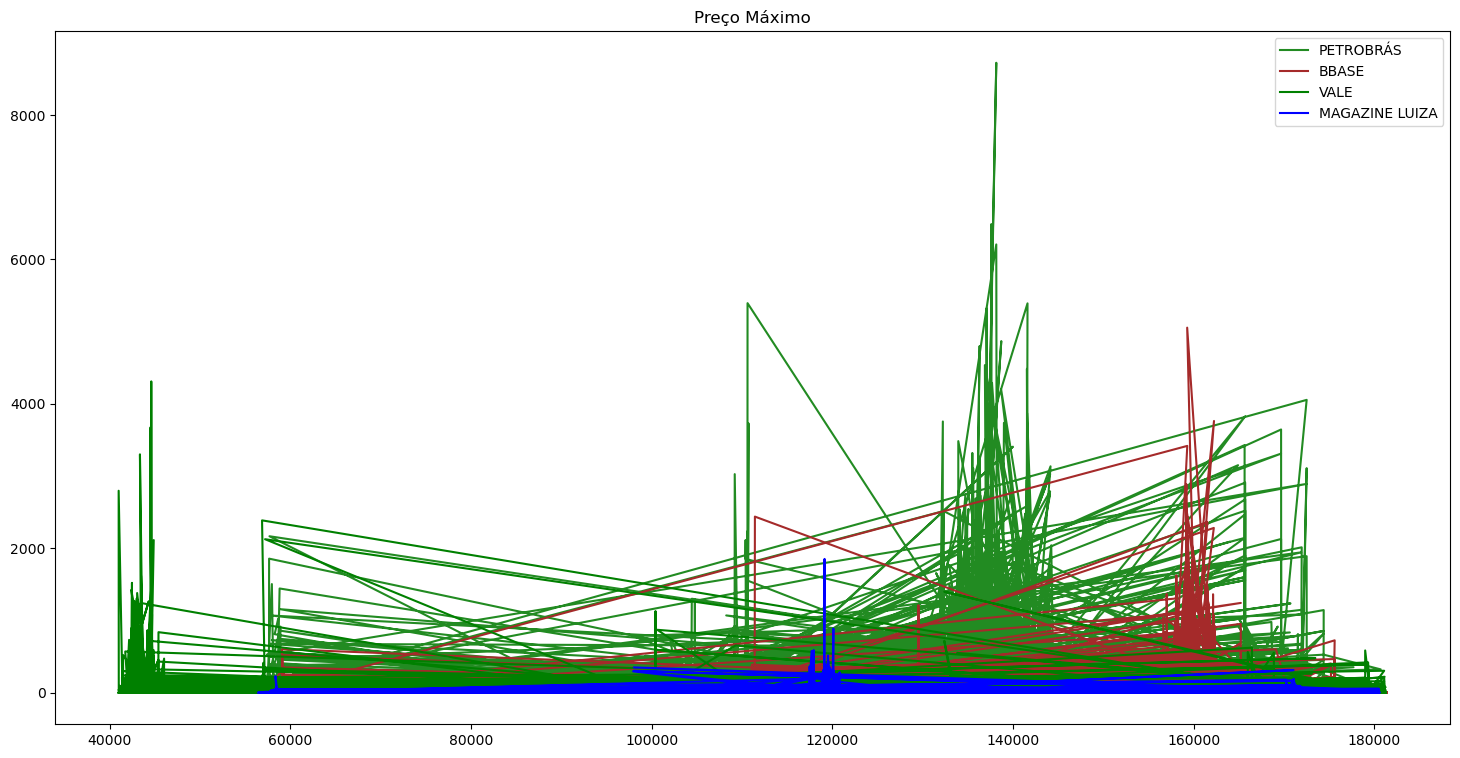

In [291]:
empresa_1['numero_negocios'].plot(label = "PETROBRÁS", color = "forestgreen", figsize = (18,9))
empresa_2['numero_negocios'].plot(label = "BBASE", color = 'brown')
empresa_3['numero_negocios'].plot(label = "VALE", color = 'green')
empresa_4['numero_negocios'].plot(label = "MAGAZINE LUIZA", color = 'blue')



plt.title('Preço Máximo')
plt.legend()
plt.show()

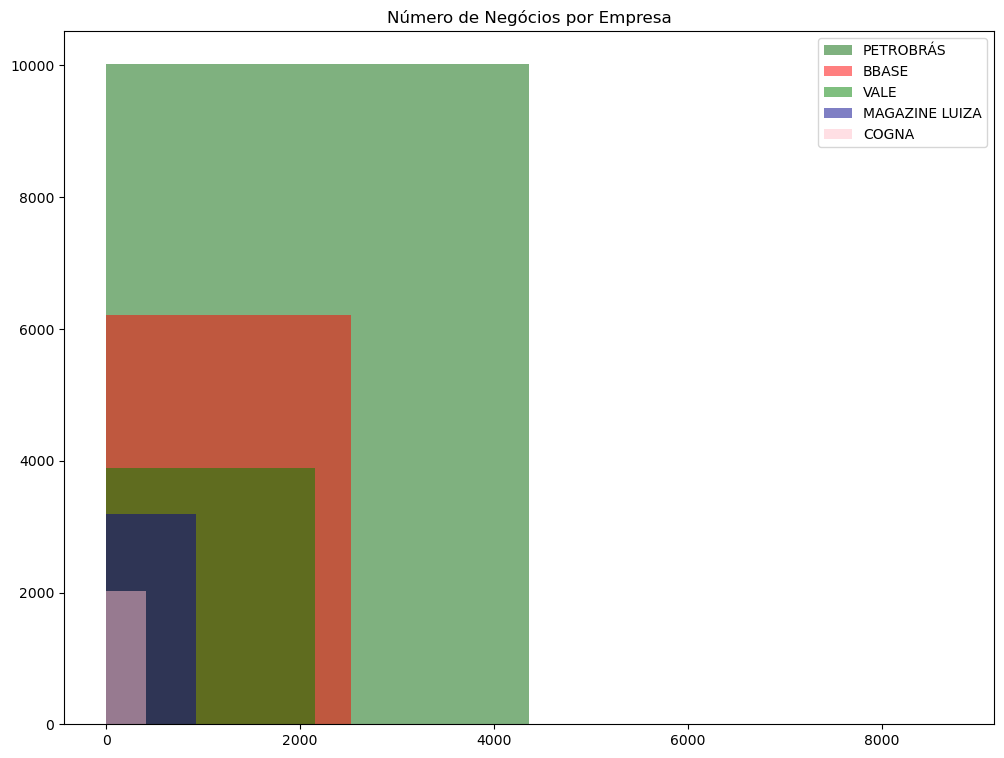

In [292]:
plt.hist(empresa_1['numero_negocios'], alpha=0.5, label='PETROBRÁS', bins=2, color='darkgreen')
plt.hist(empresa_2['numero_negocios'], alpha=0.5, label='BBASE', bins=2, color='red')
plt.hist(empresa_3['numero_negocios'], alpha=0.5, label='VALE', bins=2, color='g')
plt.hist(empresa_4['numero_negocios'], alpha=0.5, label='MAGAZINE LUIZA', bins=2, color='darkblue')
plt.hist(empresa_5['numero_negocios'], alpha=0.5, label='COGNA', bins=2, color='pink')
plt.title("Número de Negócios por Empresa")
plt.legend()
plt.rcParams['figure.figsize'] = (12, 9)

<AxesSubplot:xlabel='data_pregao', ylabel='preco_ultimo_negocio'>

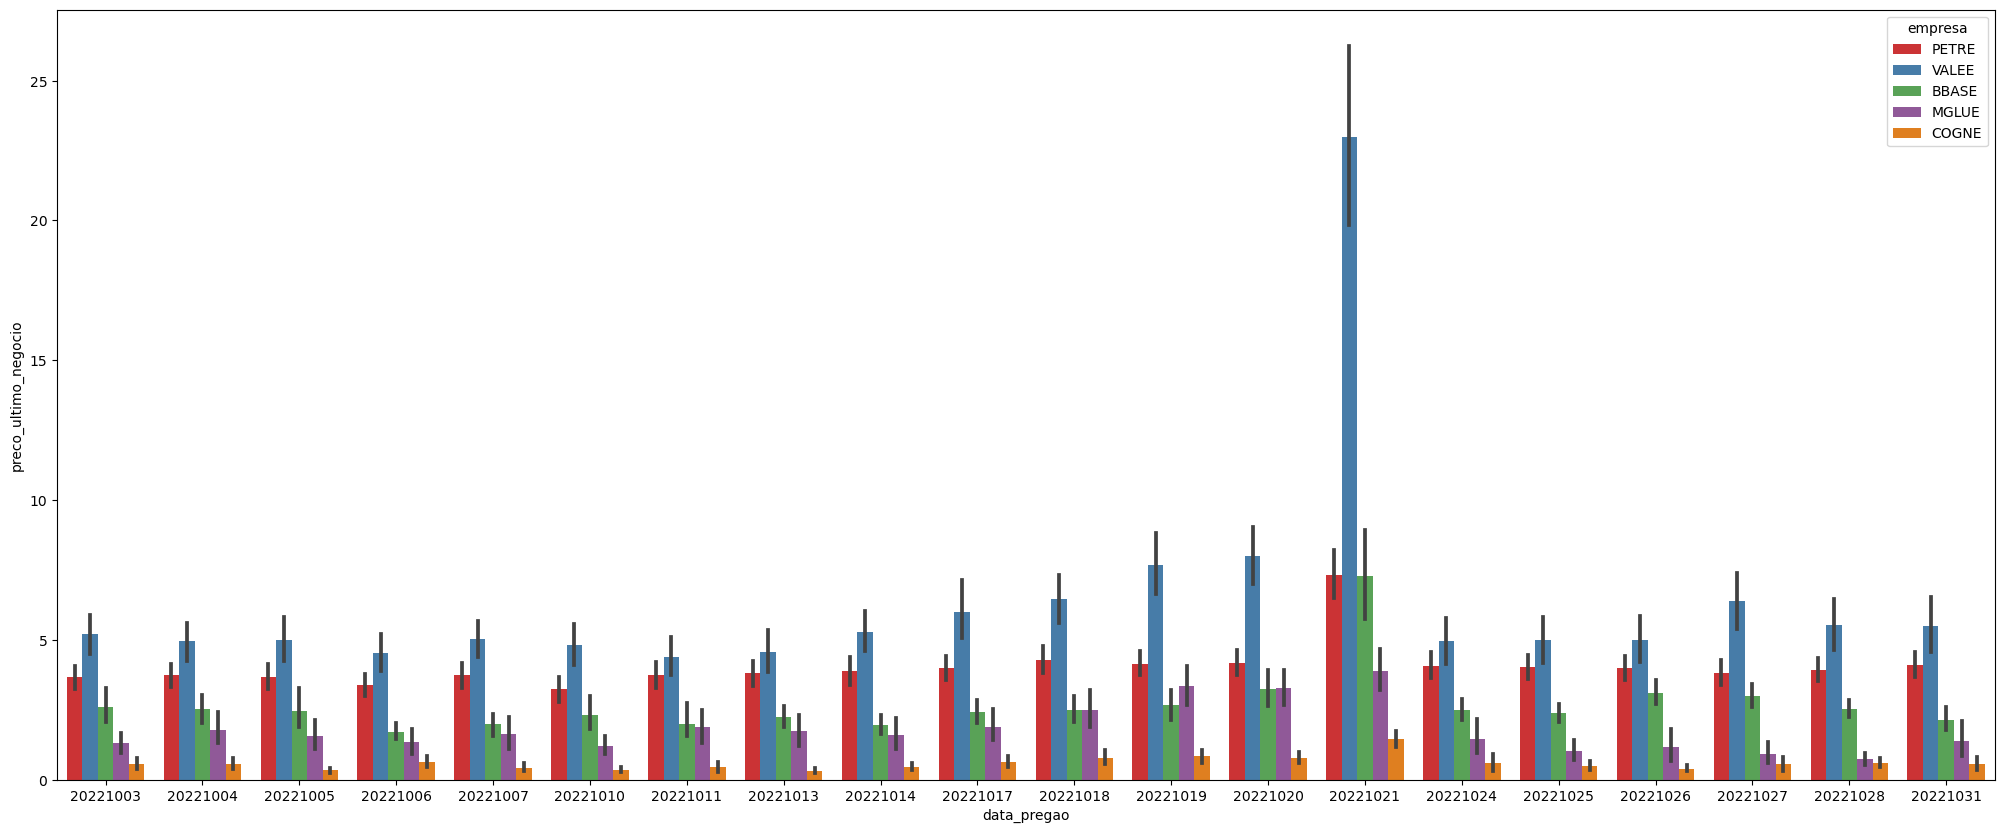

In [293]:
plt.figure(figsize=(25,10))
sns.barplot(data=empresas, x="data_pregao", y="preco_ultimo_negocio", hue = "empresa")

In [294]:
fig = px.scatter(empresas, x = 'numero_negocios', y = 'preco_maximo', color = 'empresa', hover_name = "empresa", log_x = True, width = 800)
fig.update_traces(marker=dict(size = 10,line = dict(width = 1)),selector=dict(mode = 'markers'))
fig.update_layout(title = 'Análise de Nº de Negócios vs. Preço Máximo')
fig.update_xaxes(title = 'Nº de Negócios')
fig.update_yaxes(title = 'Preço Máximo')
fig.show()

<AxesSubplot:xlabel='numero_negocios', ylabel='empresa'>

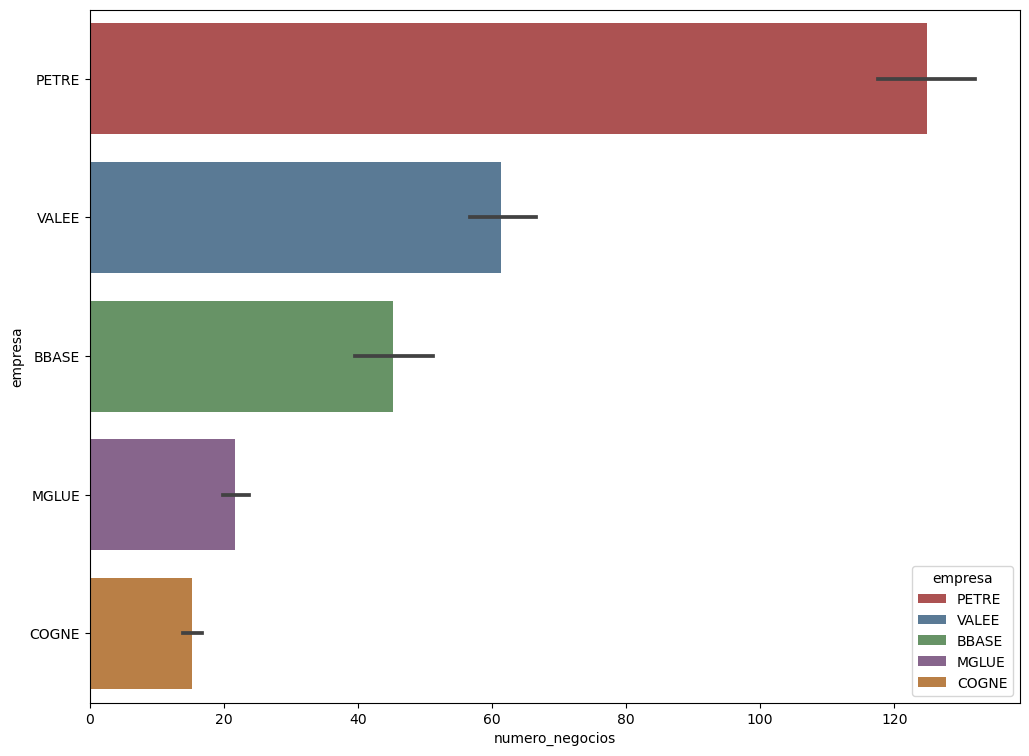

In [295]:
sns.barplot(data=empresas, y="empresa", x="numero_negocios", hue="empresa", saturation=0.45, orient = 'h', linewidth=3, dodge=False)

In [296]:
empresas_lite = empresas[["data_pregao", "empresa", "preco_abertura", "preco_maximo", "quantidade_papeis_negociados", "volume_total_negociado" ]]

In [297]:
empresas_lite['quantidade_papeis_negociados'].unique()

array([7.0000e+03, 5.0000e+02, 1.1000e+03, ..., 1.3029e+06, 8.2920e+05,
       3.9340e+05])

In [298]:
emp1 = empresas_lite.loc[(empresas_lite['empresa'] == 'PETRE') & (empresas_lite['preco_maximo'] == 49.77)]
emp2 = empresas_lite.loc[(empresas_lite['empresa'] == 'VALEE') & (empresas_lite['preco_maximo'] == 113.66)]
emp3 = empresas_lite.loc[(empresas_lite['empresa'] == 'BBASE') & (empresas_lite['preco_maximo'] > 80)]
emp4 = empresas_lite.loc[(empresas_lite['empresa'] == 'MGLUE') & (empresas_lite['preco_maximo'] > 26.20)]

In [299]:
list = []
for value in empresas_lite.columns.values:
    list.append(value)

In [300]:
df = pd.DataFrame(emp1, columns = list)

In [301]:
dff = pd.concat([emp1, emp2, emp3, emp4])

# - K-means (Algoritmo de Lloyd Max)

In [325]:
#import k-means module to work with
from sklearn.cluster import KMeans

## -- Comparing Last Price with Number of Trades

### + Company: Petrobrás

#### > Ellbow Method to determine the number of clusters

In [326]:
df_group = empresa_1[['preco_ultimo_negocio', 'numero_negocios']]

<AxesSubplot:>

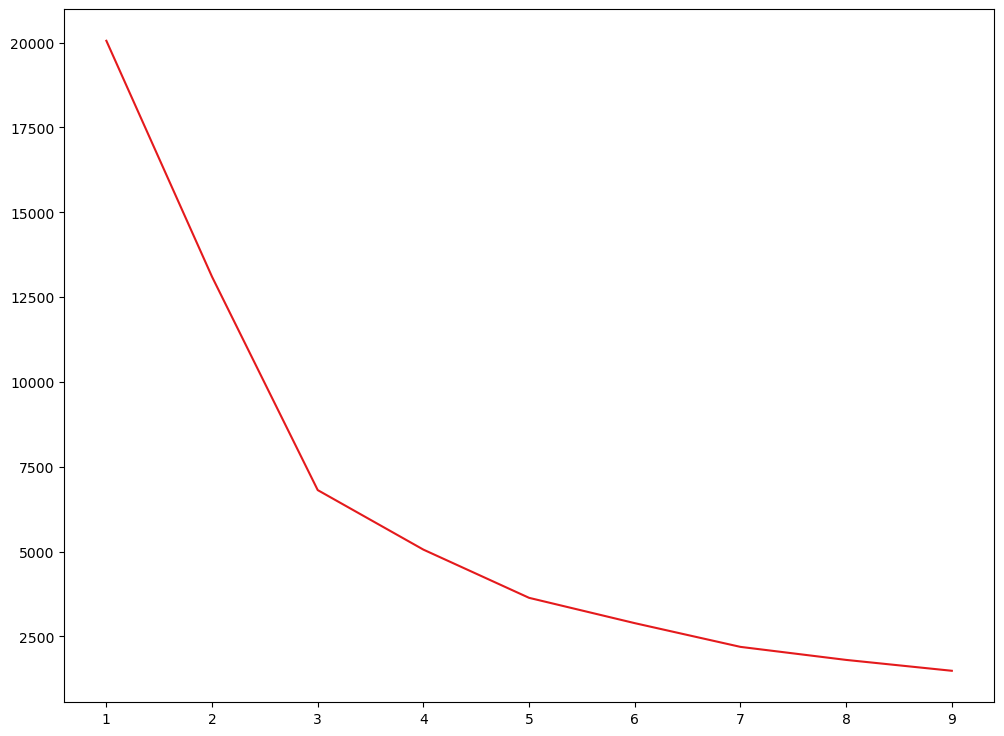

In [327]:
disps = []
scaler_object = StandardScaler()
df_group_elb = scaler_object.fit_transform(df_group)
for i in range(1,10):
    kmeansp = KMeans(n_clusters=i)
    kmeansp.fit(df_group_elb)
    disps.append(kmeansp.inertia_)
sns.lineplot(x=range(1,10), y=disps)

### > Separate the dataset into groups

In [328]:
kmeansp = KMeans(n_clusters=5)
kmeansp.fit(df_group)

KMeans(n_clusters=5)

<AxesSubplot:xlabel='preco_ultimo_negocio', ylabel='numero_negocios'>

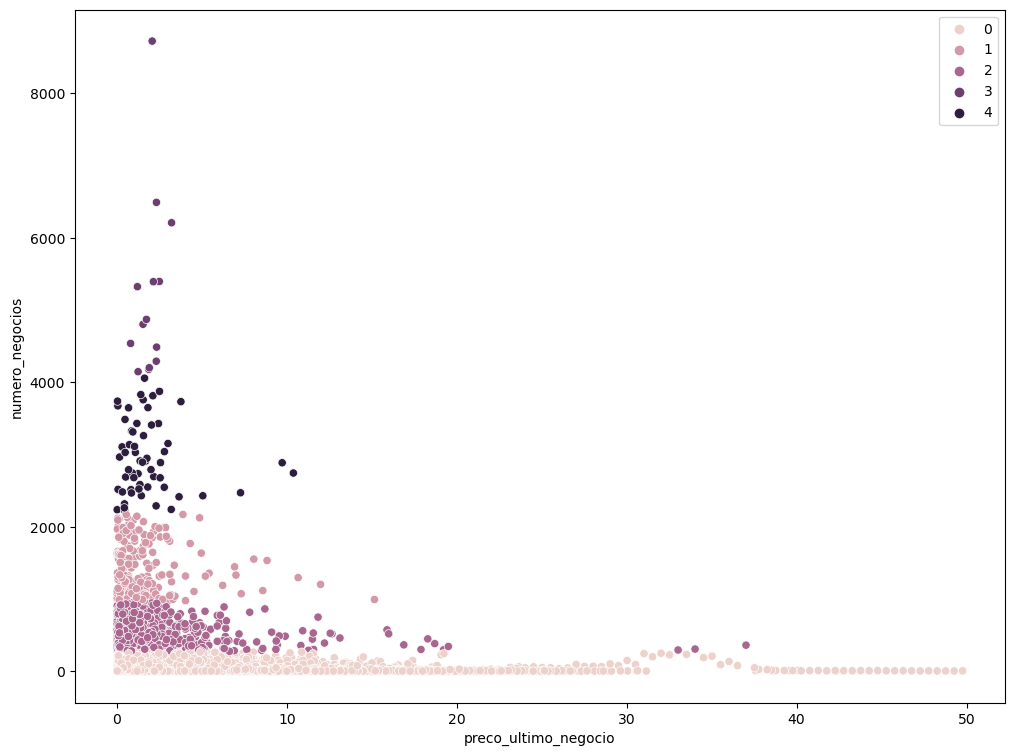

In [336]:
sns.scatterplot(data=df_group, x='preco_ultimo_negocio', y='numero_negocios', hue=kmeansp.labels_)

### + Company: Cogna

<AxesSubplot:>

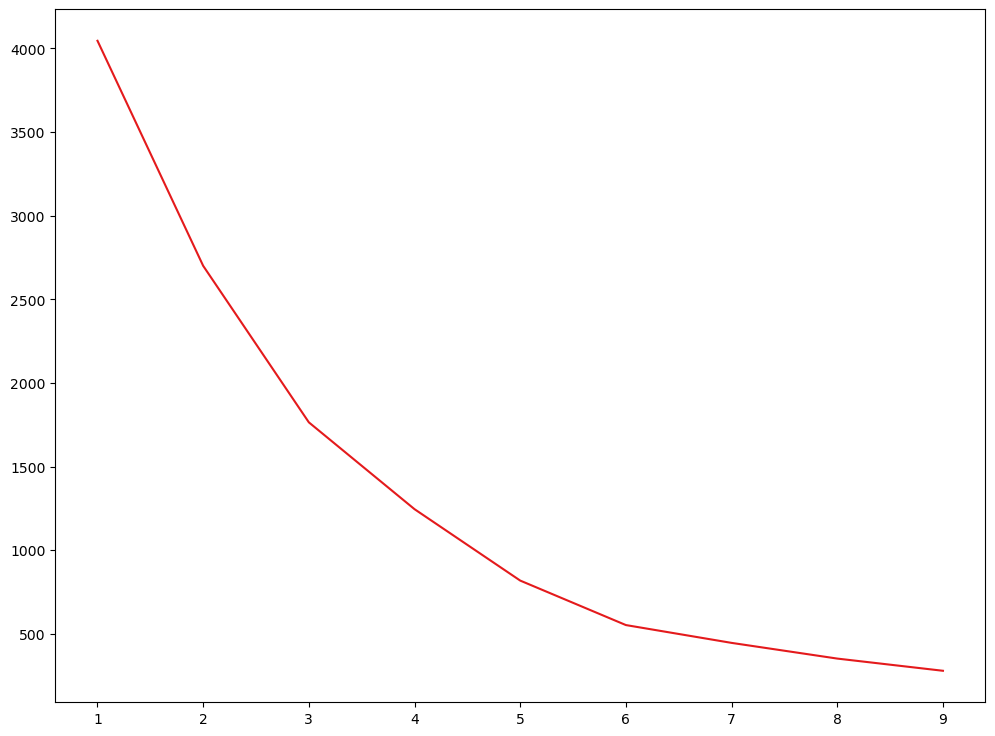

In [337]:
df2_group = empresa_5[['preco_ultimo_negocio', 'numero_negocios']]
disps = []
scaler_object = StandardScaler()
df2_group_elb = scaler_object.fit_transform(df2_group)
for i in range(1,10):
    kmeansc = KMeans(n_clusters=i)
    kmeansc.fit(df2_group_elb)
    disps.append(kmeansc.inertia_)
sns.lineplot(x=range(1,10), y=disps)

<AxesSubplot:xlabel='preco_ultimo_negocio', ylabel='numero_negocios'>

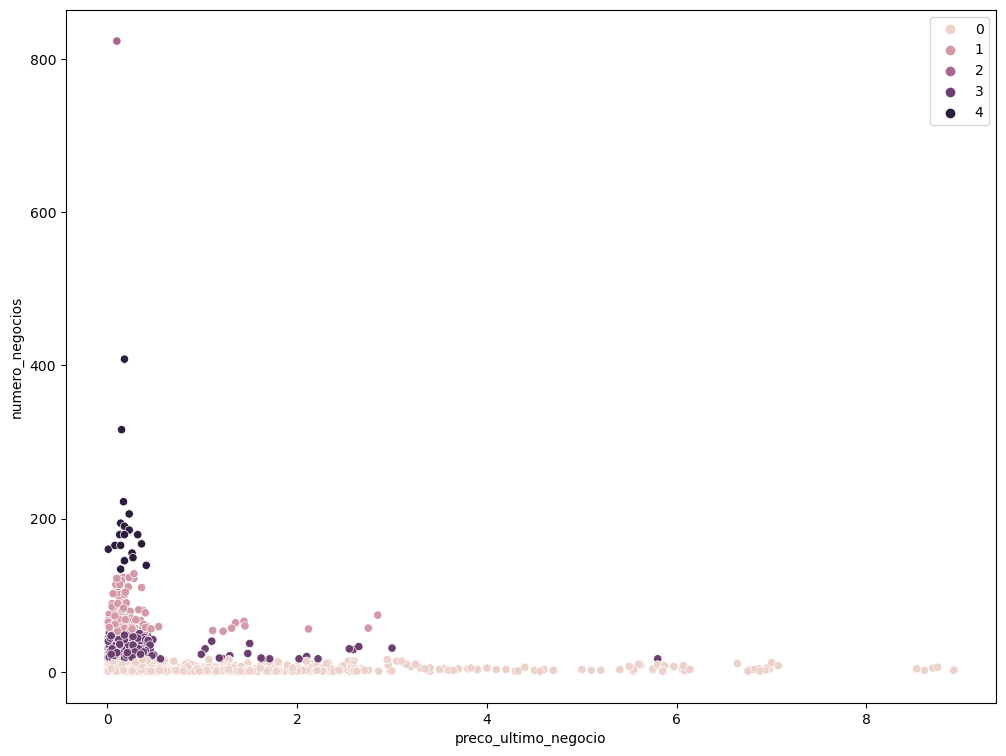

In [338]:
kmeansc = KMeans(n_clusters=5)
kmeansc.fit(df2_group)
sns.scatterplot(data=df2_group, x='preco_ultimo_negocio', y='numero_negocios', hue=kmeansc.labels_)

## -- Comparing Total Trading Volume with Opening Price

### + Company: Petrobrás

<AxesSubplot:>

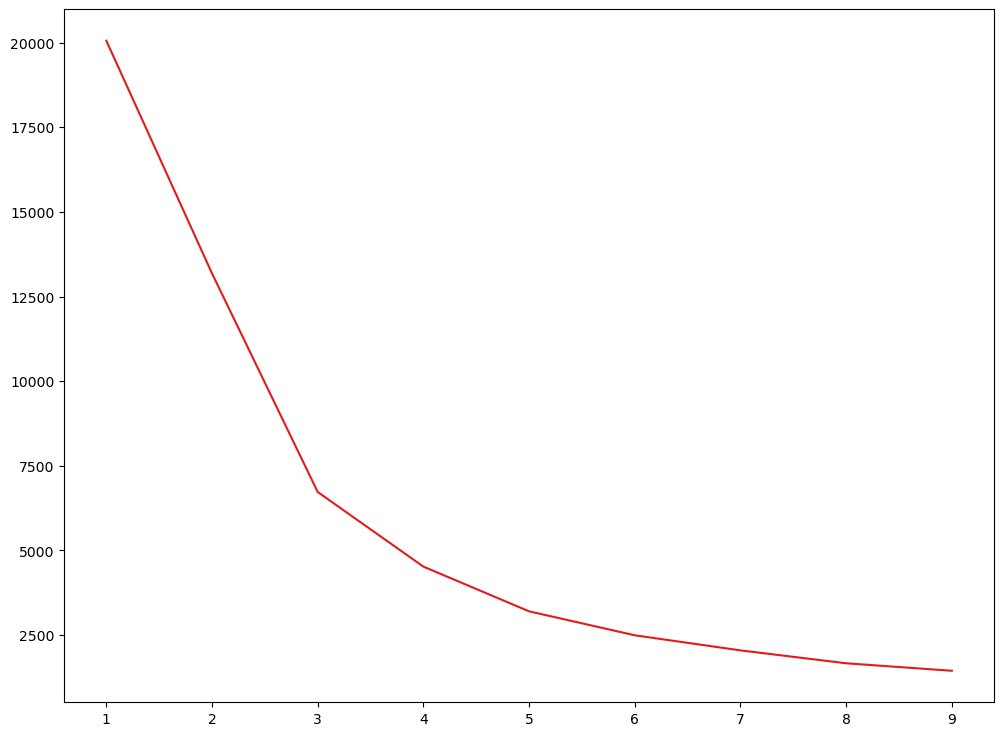

In [339]:
df_group_comparing2 = empresa_1[['volume_total_negociado', 'preco_abertura']]
disps = []
scaler_object = StandardScaler()
df_group_elb_2 = scaler_object.fit_transform(df_group_comparing2)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_group_elb_2)
    disps.append(kmeans.inertia_)
sns.lineplot(x=range(1,10), y=disps)

<AxesSubplot:xlabel='volume_total_negociado', ylabel='preco_abertura'>

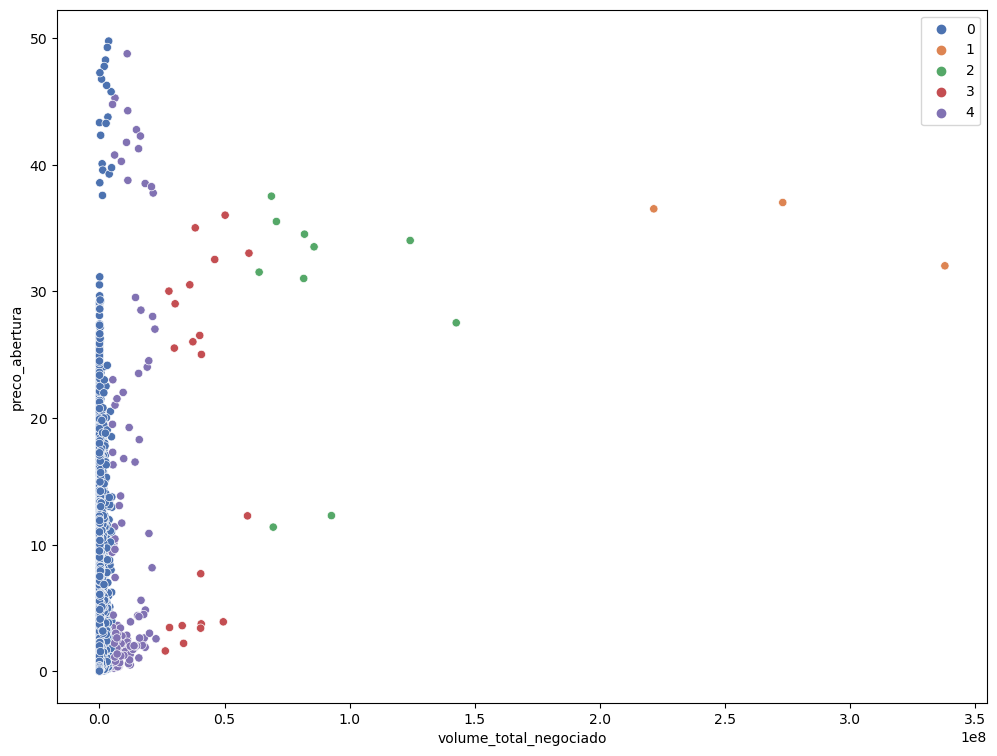

In [340]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_group_comparing2)
sns.scatterplot(data=df_group_comparing2, x='volume_total_negociado', y='preco_abertura', hue=kmeans.labels_, palette="deep")

### + Company: Cogna

<AxesSubplot:>

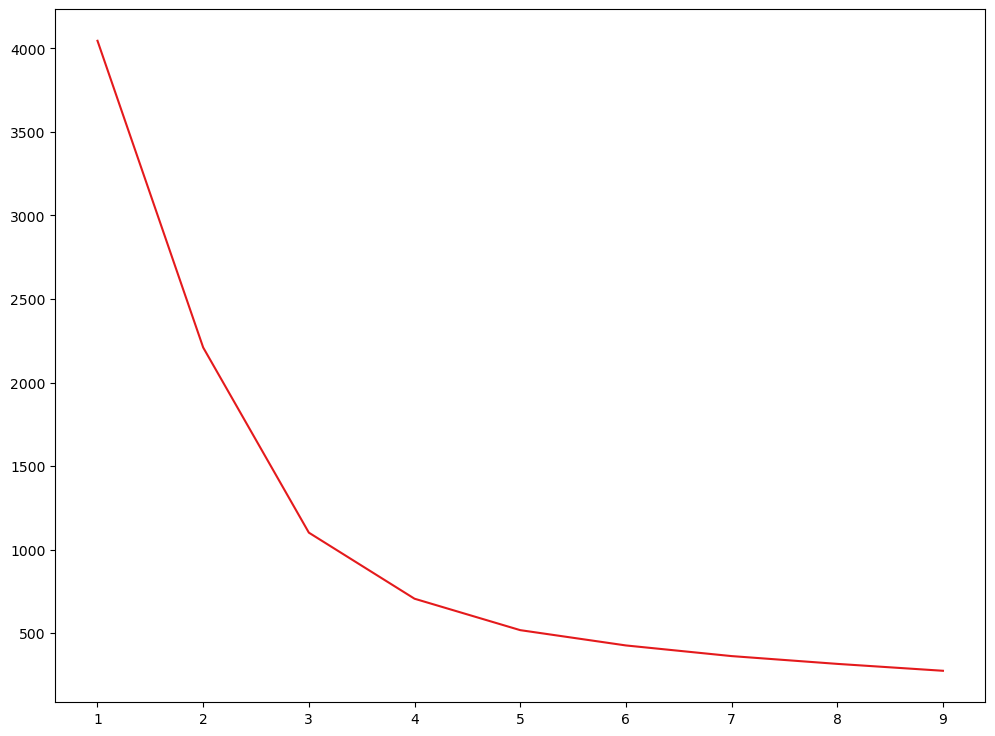

In [341]:
df2_group_comparing2 = empresa_5[['volume_total_negociado', 'preco_abertura']]
disps = []
scaler_object = StandardScaler()
df2_group_elb_2 = scaler_object.fit_transform(df2_group_comparing2)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2_group_elb_2)
    disps.append(kmeans.inertia_)
sns.lineplot(x=range(1,10), y=disps)

<AxesSubplot:xlabel='volume_total_negociado', ylabel='preco_abertura'>

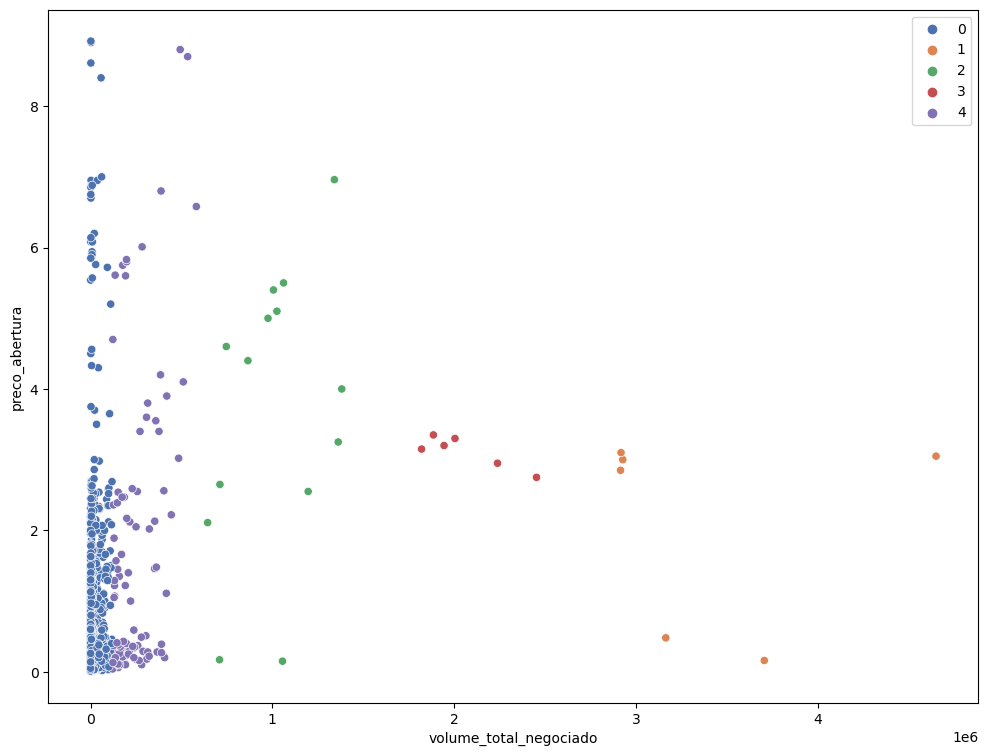

In [342]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df2_group_comparing2)
sns.scatterplot(data=df2_group_comparing2, x='volume_total_negociado', y='preco_abertura', hue=kmeans.labels_, palette="deep")

#### Algum padrão foi dectado?

#### Alguma nova pergunta foi descoberta ao analisar os agrupamentos?

# Questions answers (respostas para as questões)

## > On which day did the stock change the most? (Qual o dia que a ação mais variou?)

In [343]:
compare = pd.concat([empresa_1, empresa_5])

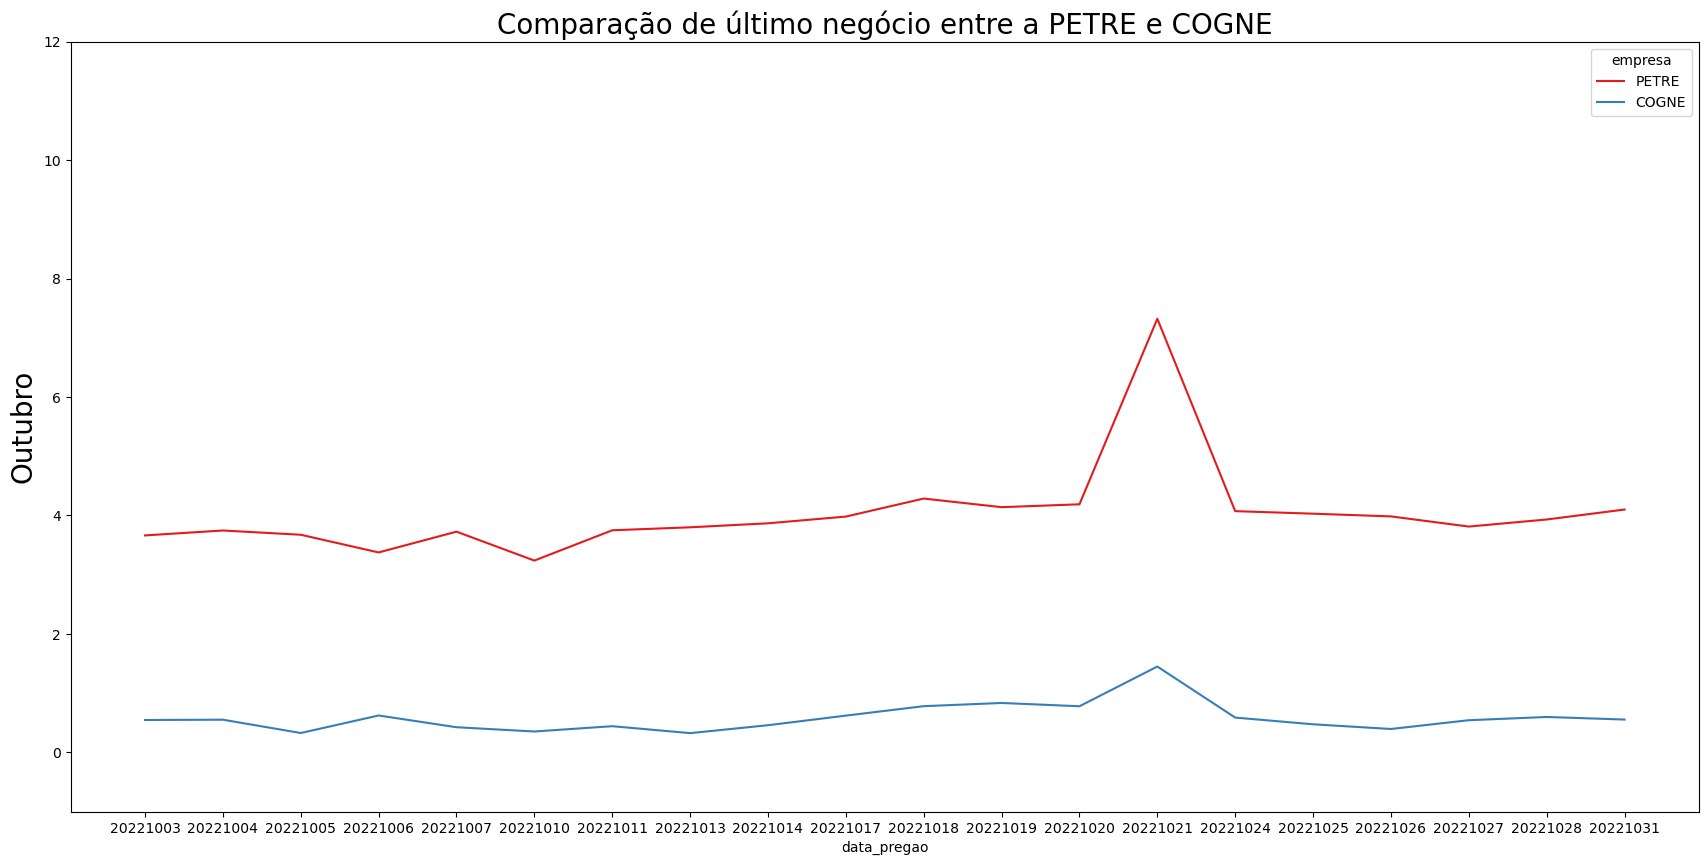

In [393]:
plt.figure(figsize=(21,10))
comparacao_ultimo_negocio = sns.lineplot(data=compare, x="data_pregao", y="preco_ultimo_negocio", hue="empresa", err_style=None) # colocando o boxplot numa variável para manipular melhor
comparacao_ultimo_negocio.set_ylabel('Outubro', fontsize=20) # Aqui você renomeia o eixo que deseja e o tamanho da fonte

comparacao_ultimo_negocio.plot() # Aqui é como se o gráfico fosse ocultado até ser usado plt.show()

plt.ylim(-1, 12)
# em R$ - Reais
plt.title('Comparação de último negócio entre a PETRE e COGNE', fontsize=20) # O título que se deseja colocar acima do gráfico
plt.show() # Impressão do gráfico

## Comparando mês de Outubro com Novembro

### Tratando os dados do mês de novembro

In [345]:
#this file is compressed in the datasets repository, 
#extract it before running this code snippet
arquivo_bovespa_2 = 'https://raw.githubusercontent.com/data-science-ci/actions-price-analysis/main/datasets/COTAHIST_M112022' 


#Define the size of fields
tamanho_campos=[2,8,2,12,3,12,10,3,4,13,13,13,13,13,13,13,5,18,18,13,1,8,7,13,12,3]

# Read the data and receive two positional arguments, widhts who have the fields size and header = 0
dados_acoes_2=pd.read_fwf(arquivo_bovespa_2, widths=tamanho_campos, header=0)


# Name the columns
# Data structure available at http://www.b3.com.br/data/files/33/67/B9/50/D84057102C784E47AC094EA8/SeriesHistoricas_Layout.pdf
dados_acoes_2.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

# Remove last line
linha=len(dados_acoes_2["data_pregao"])
dados_acoes_2=dados_acoes_2.drop(linha-1)

# Adjust values with a comma (divide the values of these columns by 100)
listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
]

for coluna in listaVirgula:
    dados_acoes_2[coluna]=[i/100. for i in dados_acoes_2[coluna]]
    
dados_acoes_2 = dados_acoes_2.sort_values(by=['data_pregao'])

empresa2_1 = dados_acoes_2[dados_acoes_2["empresa"] == "PETRE"]
empresa2_5 = dados_acoes_2[dados_acoes_2["empresa"] == "COGNE"]

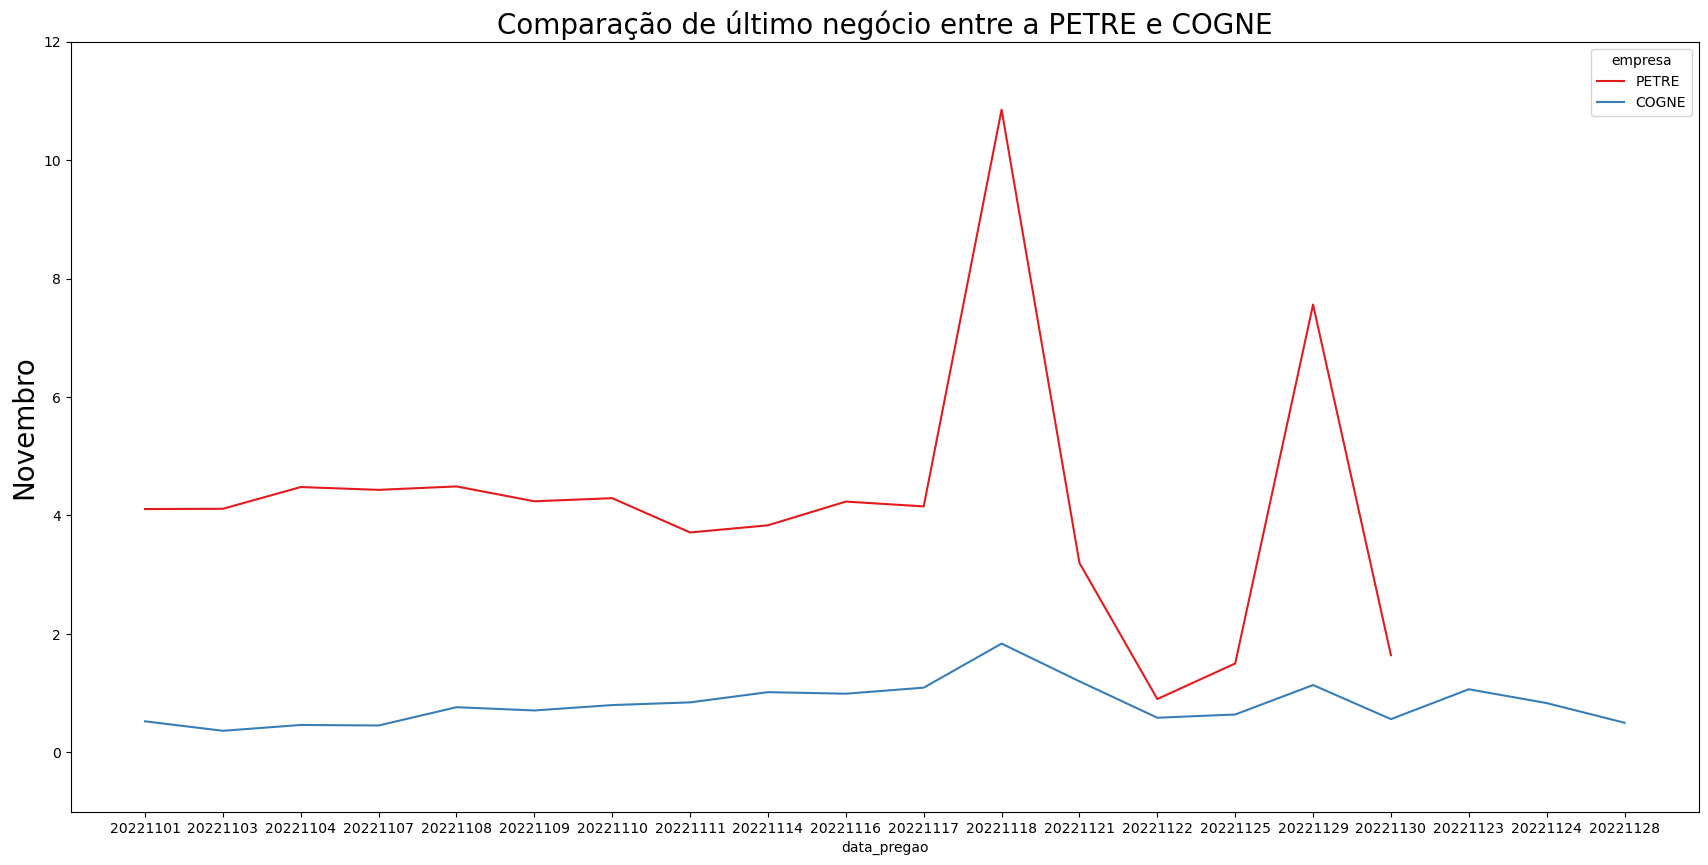

In [394]:
compare2 = pd.concat([empresa2_1, empresa2_5])
plt.figure(figsize=(21,10))
comparacao_ultimo_negocio2 = sns.lineplot(data=compare2, x="data_pregao", y="preco_ultimo_negocio", hue="empresa", err_style=None) # colocando o boxplot numa variável para manipular melhor
comparacao_ultimo_negocio2.set_ylabel('Novembro', fontsize=20) # Aqui você renomeia o eixo que deseja e o tamanho da fonte

comparacao_ultimo_negocio2.plot() # Aqui é como se o gráfico fosse ocultado até ser usado plt.show()

plt.ylim(-1, 12)
# em R$ - Reais
plt.title('Comparação de último negócio entre a PETRE e COGNE', fontsize=20) # O título que se deseja colocar acima do gráfico
plt.show() # Impressão do gráfico

## > Comparing grouping of 2 companies (Comparando agrupamento em 2 empresas)

### Cogna

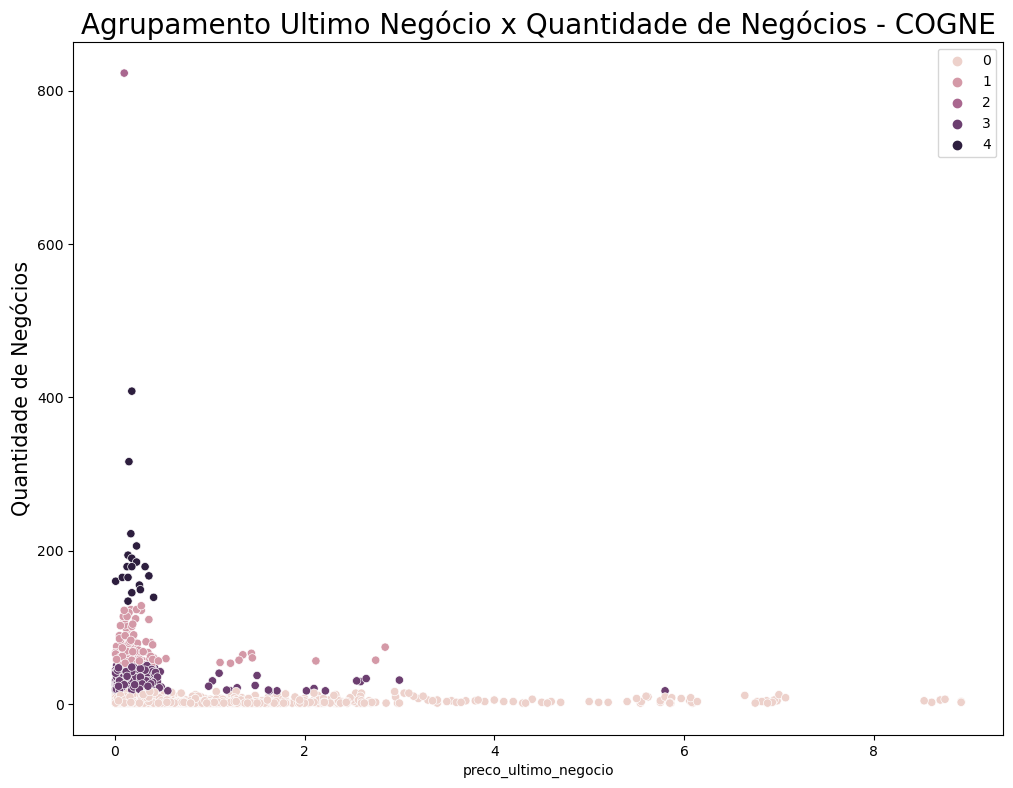

In [385]:
agrupar_cogna = sns.scatterplot(data=df2_group, x='preco_ultimo_negocio', y='numero_negocios', hue=kmeansc.labels_)
agrupar_cogna.set_ylabel('Quantidade de Negócios', fontsize=15) # Aqui você renomeia o eixo que deseja e o tamanho da fonte

agrupar_cogna.plot() # Aqui é como se o gráfico fosse ocultado até ser usado plt.show()

# em R$ - Reais
plt.title('Agrupamento Ultimo Negócio x Quantidade de Negócios - COGNE', fontsize=20) # O título que se deseja colocar acima do gráfico
plt.show() # Impressão do gráfico

Sem escala

### Petre

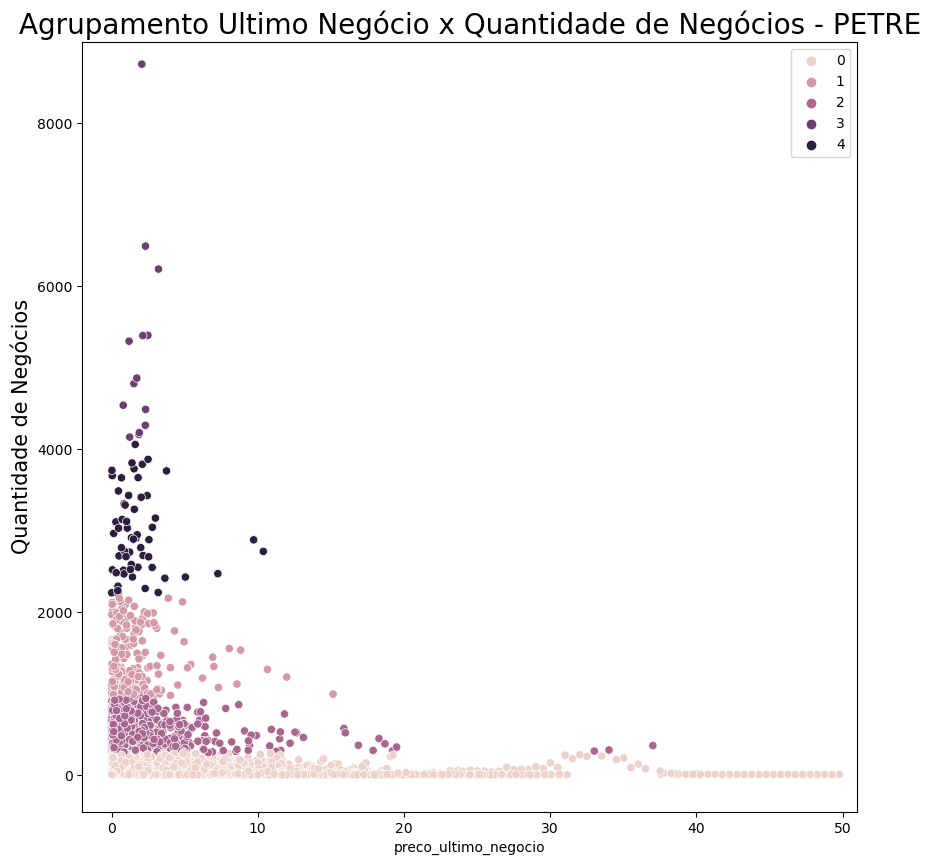

In [383]:
plt.figure(figsize=(10,10))
agrupar_petre = sns.scatterplot(data=df_group, x='numero_negocios', y='preco_ultimo_negocio', hue=kmeansp.labels_)
agrupar_petre.set_ylabel('Quantidade de Negócios', fontsize=15) # Aqui você renomeia o eixo que deseja e o tamanho da fonte

agrupar_petre.plot() # Aqui é como se o gráfico fosse ocultado até ser usado plt.show()

# em R$ - Reais
plt.xlim(-2, 51)
plt.ylim(-450, 9000)
plt.title('Agrupamento Ultimo Negócio x Quantidade de Negócios - PETRE', fontsize=20) # O título que se deseja colocar acima do gráfico
plt.show() # Impressão do gráfico

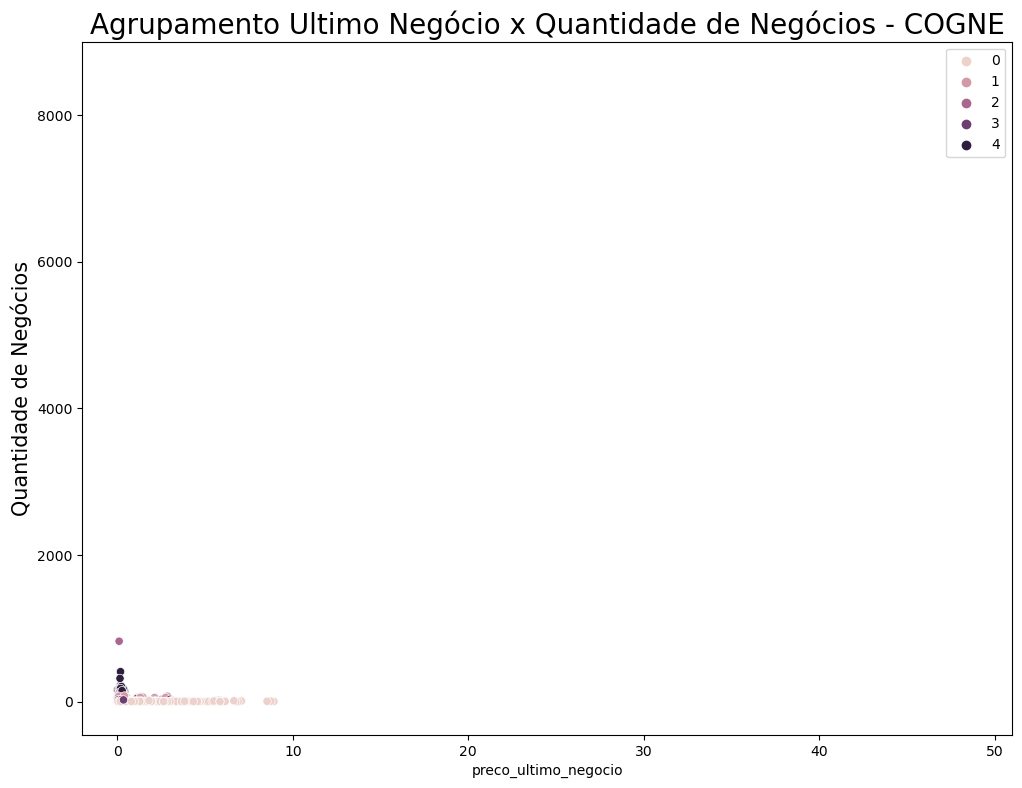

In [384]:
agrupar_cogna = sns.scatterplot(data=df2_group, x='preco_ultimo_negocio', y='numero_negocios', hue=kmeansc.labels_)
agrupar_cogna.set_ylabel('Quantidade de Negócios', fontsize=15) # Aqui você renomeia o eixo que deseja e o tamanho da fonte

agrupar_cogna.plot() # Aqui é como se o gráfico fosse ocultado até ser usado plt.show()

# em R$ - Reais
plt.xlim(-2, 51)
plt.ylim(-450, 9000)
plt.title('Agrupamento Ultimo Negócio x Quantidade de Negócios - COGNE', fontsize=20) # O título que se deseja colocar acima do gráfico
plt.show() # Impressão do gráfico

>Com escala

## Conclusion

 #### Future works
 As an improvement and future work there is the possibility of improving the anapy library;
This library aims to provide less common but relevant static measures for the field of this analysis and these functions can be used in similar work in the business intelligence application domain <br>
     <p>An example of future improment is the modularization of the central_tendency_measures() function and also set_meta_data() to work with other datasets</p>